⚠️ PyTorch non disponible - tentative installation cuGraph standard...
✅ GPU packages installés
✅ Imports réussis
💻 PyTorch non installé - tentative détection GPU alternative...
💻 Pas de GPU détecté - Utilisation CPU

📊 Configuration finale: CPU (NetworkX)
📱 Colab Secrets chargés (si configurés)

🔑 APIs configurées:
  • Alchemy: ❌
  • Etherscan: ❌
  • BitQuery: ❌

⚠️ AUCUNE API configurée - Mode DEMO (graphe synthétique)
   Pour tester les APIs:
   1. Colab: Secrets → Ajouter ALCHEMY_API_KEY, etc.
   2. Local: Créer fichier .env avec vos clés

🧪 Test de performance des APIs...

⚠️ Aucune API à tester - continuons avec graphe synthétique
🏗️ Génération graphe: 200 nodes, 1000 edges
  🚨 Ajout de patterns suspects (wash trading)...
✅ Graphe créé: 205 nodes, 993 edges

📊 Stats du graphe:
   Nodes: 205
   Edges: 993
   Densité: 0.0237
   Composantes connexes: 2
🏁 Benchmark PageRank (3 runs)...

💻 Test CPU (NetworkX natif)...
   Run 1: 0.0026s
   Run 2: 0.0023s
   Run 3: 0.0023s

⚠️ GPU non d

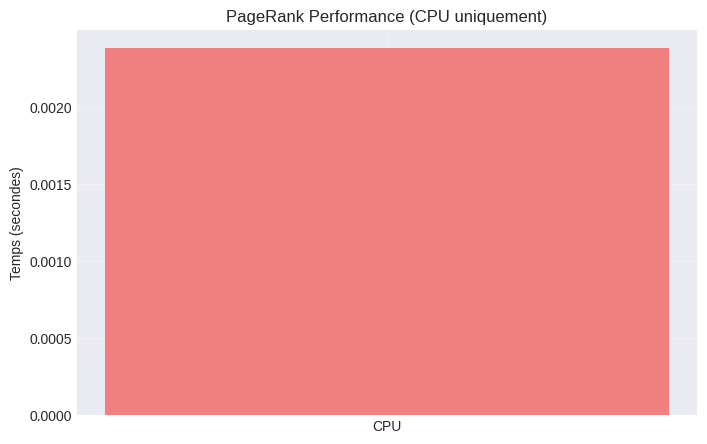

🔵 Louvain: Détection en cours...
   ✅ 8 communautés trouvées
   ⏱️ Temps: 0.028s
   📊 Modularité: 0.3017

🔴 Leiden: Détection en cours...
   ✅ 10 communautés trouvées
   ⏱️ Temps: 0.068s
   📊 Modularité: 0.3007

📊 COMPARAISON LEIDEN vs LOUVAIN
Algorithme  Communautés  Modularité  Temps (s)
   Louvain            8    0.301705   0.028009
    Leiden           10    0.300654   0.067815

🏆 VERDICT:
   Louvain a une MEILLEURE modularité
   Louvain est PLUS RAPIDE
📊 Calcul des métriques...
  - PageRank...
  - Coefficient Gini...
  - Degree centrality...
  - Betweenness centrality...
  - Clustering coefficient...
✅ Métriques calculées

🏆 TOP 15 WALLETS PAR PAGERANK:
    Wallet      Balance  PageRank  Degree  Clustering
wallet_179  5461.873142  0.010299      13    0.060606
wallet_121   961.988615  0.010042      14    0.021978
 wallet_39  1402.845240  0.009903      13    0.038462
 wallet_83 12919.820295  0.009579      10    0.066667
  wallet_6   631.472233  0.008957      13    0.090909
 wallet_1

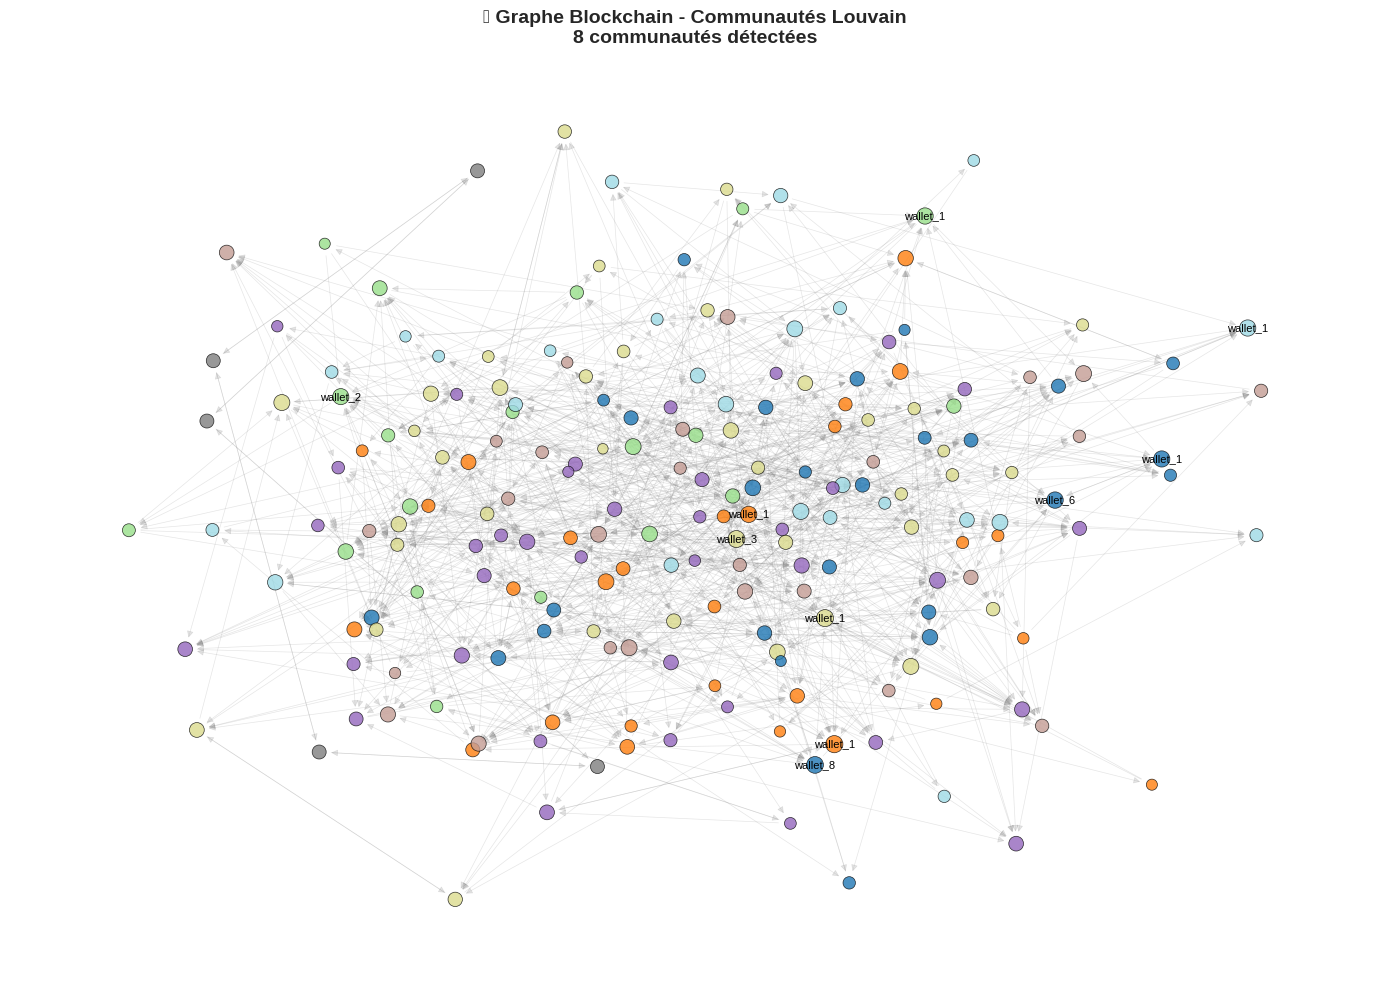

🎨 Visualisation Leiden...


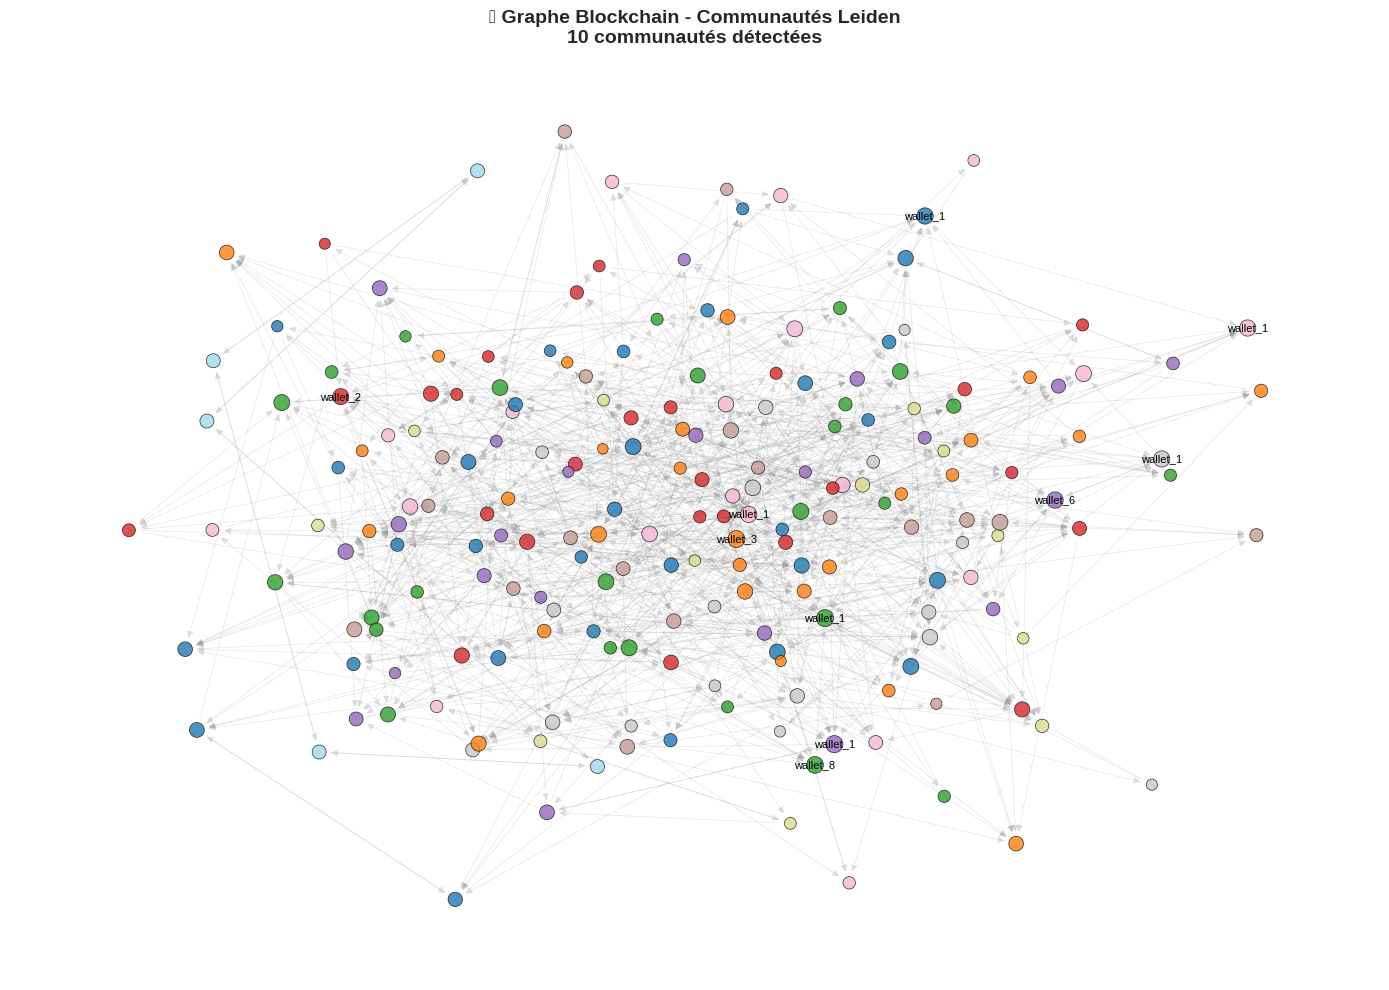

🚨 Détection de patterns suspects...
✅ 0 clusters suspects trouvés
✅ 16 paires de wash trading détectées

💸 WASH TRADING: 16 paires détectées

  Paire 1:
    wallet_6... ↔️ wallet_162...
    Montants: 737 ↔️ 753

  Paire 2:
    wallet_99... ↔️ wallet_170...
    Montants: 935 ↔️ 996

  Paire 3:
    wallet_125... ↔️ wallet_189...
    Montants: 826 ↔️ 752
📊 RAPPORT D'ANALYSE BLOCKCHAIN - BLOCKSTAT

🔧 CONFIGURATION:
  • Backend: CPU (NetworkX)
  • GPU disponible: ❌ Non

📈 GRAPHE:
  • Nodes (wallets): 205
  • Edges (transactions): 993
  • Densité: 0.0237

🏆 ALGORITHMES DE COMMUNAUTÉ:
  Louvain:
    • Communautés: 8
    • Modularité: 0.3017
    • Temps: 0.028s
  Leiden:
    • Communautés: 10
    • Modularité: 0.3007
    • Temps: 0.068s
  🏆 Meilleur algorithme: Louvain

📊 MÉTRIQUES:
  • Coefficient Gini: 0.6377 (✅ OK)
  • Clustering moyen: 0.0464

🚨 RISQUES DÉTECTÉS:
  • Clusters suspects: 0
  • Wash trading: 16 paires

🔗 APIs TESTÉES:
  • ALCHEMY: ❌ Non disponible
  • BITQUERY: ❌ Non disponib

In [2]:
# ============================================================================
# BLOCKSTAT - Analyse de Graphes Blockchain avec Accélération GPU
# Objectifs:
# 1. Accélération NetworkX avec cuGraph (GPU) vs CPU
# 2. Comparaison Leiden vs Louvain
# 3. Visualisations complètes
# 4. Tests de performance API
# ============================================================================

# %% [markdown]
# # 📊 BlockStat - Analyse de Graphes Blockchain
#
# Ce notebook implémente:
# - **Accélération GPU automatique** avec NVIDIA cuGraph (si disponible)
# - **Comparaison d'algorithmes** (Leiden vs Louvain)
# - **Visualisations avancées** des graphes et métriques
# - **Tests de performance** des APIs blockchain
#
# ## ⚡ Pour Google Colab:
# - GPU activé automatiquement si disponible
# - Fonctionne aussi en mode CPU
# - Runtime → Change runtime type → GPU (T4) pour activer GPU

# %% [markdown]
# ## 🔧 Cellule 1: Installation et Configuration

# %%
# Installation des dépendances
!pip install -q networkx numpy matplotlib seaborn pandas plotly
!pip install -q python-louvain leidenalg igraph
!pip install -q requests python-dotenv

# Pour GPU (optionnel - ne s'installera que si GPU NVIDIA disponible)
try:
    import torch
    if torch.cuda.is_available():
        print("🎮 GPU NVIDIA détecté via PyTorch!")
        # Installer cuGraph SANS conflits avec PyTorch
        !pip install -q --no-deps nx-cugraph-cu12
        print("✅ nx-cugraph installé (sans dépendances conflictuelles)")
    else:
        print("⚠️ Pas de GPU détecté - CPU sera utilisé")
except:
    print("⚠️ PyTorch non disponible - tentative installation cuGraph standard...")
    try:
        !pip install -q cupy-cuda12x nx-cugraph-cu12
        print("✅ GPU packages installés")
    except:
        print("⚠️ Pas de GPU - CPU sera utilisé")

# %%
# Imports
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import time
import warnings
from typing import Dict, List, Tuple
warnings.filterwarnings('ignore')

# Algorithmes de communauté
import igraph as ig
from leidenalg import find_partition, ModularityVertexPartition
# FIX: python-louvain s'importe différemment
try:
    import community.community_louvain as community_louvain
except:
    import community as community_louvain

# Configuration visuelle
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Imports réussis")

# %% [markdown]
# ## 🚀 Cellule 2: Configuration Accélération GPU (NetworkX + cuGraph)

# %%
"""
ACCÉLÉRATION GPU AUTOMATIQUE
NetworkX avec cuGraph backend - Zero Code Change!
"""

# Détecter si GPU disponible
GPU_AVAILABLE = False
CUDA_DEVICE_INFO = None

try:
    # Méthode 1: Via PyTorch (plus fiable)
    import torch
    if torch.cuda.is_available():
        CUDA_DEVICE_INFO = {
            "name": torch.cuda.get_device_name(0),
            "capability": torch.cuda.get_device_capability(0),
            "memory": f"{torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB"
        }
        print("🎮 GPU NVIDIA détecté!")
        print(f"   Device: {CUDA_DEVICE_INFO['name']}")
        print(f"   Memory: {CUDA_DEVICE_INFO['memory']}")
        print(f"   Compute: {CUDA_DEVICE_INFO['capability']}")

        # Tenter activation cuGraph
        try:
            import nx_cugraph as nxcg
            # IMPORTANT: Sur Colab, nx_cugraph nécessite une configuration spéciale
            # On active UNIQUEMENT si les libs sont correctement installées
            nxcg.config.set_backend("cugraph")
            GPU_AVAILABLE = True
            print("✅ Accélération GPU activée pour NetworkX")
        except Exception as e:
            print(f"⚠️ cuGraph non disponible: {str(e)[:80]}")
            print("   → Utilisation CPU (NetworkX natif)")
    else:
        print("💻 GPU non disponible (pas de CUDA) - Utilisation CPU")

except ImportError:
    print("💻 PyTorch non installé - tentative détection GPU alternative...")
    # Méthode 2: Via CuPy
    try:
        import cupy as cp
        cp.cuda.Device(0).compute_capability
        print("🎮 GPU détecté via CuPy")

        try:
            import nx_cugraph as nxcg
            nxcg.config.set_backend("cugraph")
            GPU_AVAILABLE = True
            print("✅ Accélération GPU activée")
        except:
            print("⚠️ cuGraph non disponible - CPU sera utilisé")
    except:
        print("💻 Pas de GPU détecté - Utilisation CPU")

# Configuration des tests
TEST_CONFIG = {
    "use_gpu": GPU_AVAILABLE,
    "backend": "GPU (cuGraph)" if GPU_AVAILABLE else "CPU (NetworkX)",
    "device": CUDA_DEVICE_INFO if CUDA_DEVICE_INFO else "CPU"
}

print(f"\n📊 Configuration finale: {TEST_CONFIG['backend']}")

# %% [markdown]
# ## 📡 Cellule 3: APIs Blockchain - Configuration et Tests

# %%
"""
CONFIGURATION DES APIs BLOCKCHAIN
Test de performance: Alchemy vs BitQuery vs Etherscan

POUR GOOGLE COLAB: Décommenter et remplir vos clés ici:
"""

import requests
import os
from dotenv import load_dotenv

# Option 1: Charger depuis fichier .env (si vous l'avez uploadé)
load_dotenv()

# Option 2: POUR COLAB - Définir directement ici (remplacer par vos vraies clés)
# Décommenter et remplir:
# os.environ["ALCHEMY_API_KEY"] = "votre_clé_alchemy"
# os.environ["ETHERSCAN_API_KEY"] = "votre_clé_etherscan"
# os.environ["BITQUERY_ACCESS_TOKEN"] = "votre_token_bitquery"

# Option 3: COLAB - Utiliser les secrets (Recommandé!)
try:
    from google.colab import userdata
    try:
        os.environ["ALCHEMY_API_KEY"] = userdata.get('ALCHEMY_API_KEY')
    except:
        pass
    try:
        os.environ["ETHERSCAN_API_KEY"] = userdata.get('ETHERSCAN_API_KEY')
    except:
        pass
    try:
        os.environ["BITQUERY_ACCESS_TOKEN"] = userdata.get('BITQUERY_ACCESS_TOKEN')
    except:
        pass
    print("📱 Colab Secrets chargés (si configurés)")
except:
    print("💻 Environnement local détecté")

class BlockchainAPI:
    """Wrapper pour tester les 3 APIs"""

    def __init__(self):
        self.alchemy_key = os.getenv("ALCHEMY_API_KEY")
        self.bitquery_token = os.getenv("BITQUERY_ACCESS_TOKEN")
        self.etherscan_key = os.getenv("ETHERSCAN_API_KEY")

        self.results = {
            "alchemy": {"available": bool(self.alchemy_key), "speed": None},
            "bitquery": {"available": bool(self.bitquery_token), "speed": None},
            "etherscan": {"available": bool(self.etherscan_key), "speed": None}
        }

        # Afficher statut
        print("\n🔑 APIs configurées:")
        print(f"  • Alchemy: {'✅' if self.alchemy_key else '❌'}")
        print(f"  • Etherscan: {'✅' if self.etherscan_key else '❌'}")
        print(f"  • BitQuery: {'✅' if self.bitquery_token else '❌'}")

        if not any([self.alchemy_key, self.etherscan_key, self.bitquery_token]):
            print("\n⚠️ AUCUNE API configurée - Mode DEMO (graphe synthétique)")
            print("   Pour tester les APIs:")
            print("   1. Colab: Secrets → Ajouter ALCHEMY_API_KEY, etc.")
            print("   2. Local: Créer fichier .env avec vos clés")

    def test_alchemy(self, token_address: str) -> tuple[bool, float]:
        """Test Alchemy API speed"""
        if not self.alchemy_key:
            return False, 0

        url = f"https://eth-mainnet.g.alchemy.com/v2/{self.alchemy_key}"
        payload = {
            "jsonrpc": "2.0",
            "id": 1,
            "method": "eth_blockNumber"  # Simple query
        }

        start = time.time()
        try:
            response = requests.post(url, json=payload, timeout=10)
            elapsed = time.time() - start
            return response.status_code == 200, elapsed
        except Exception as e:
            print(f"  ⚠️ Alchemy error: {str(e)[:50]}")
            return False, 0

    def test_etherscan(self, token_address: str) -> tuple[bool, float]:
        """Test Etherscan API speed"""
        if not self.etherscan_key:
            return False, 0

        url = f"https://api.etherscan.io/api"
        params = {
            "module": "proxy",
            "action": "eth_blockNumber",
            "apikey": self.etherscan_key
        }

        start = time.time()
        try:
            response = requests.get(url, params=params, timeout=10)
            elapsed = time.time() - start
            return response.status_code == 200, elapsed
        except Exception as e:
            print(f"  ⚠️ Etherscan error: {str(e)[:50]}")
            return False, 0

    def test_bitquery(self) -> tuple[bool, float]:
        """Test BitQuery API speed"""
        if not self.bitquery_token:
            return False, 0

        url = "https://graphql.bitquery.io/"
        headers = {"Authorization": f"Bearer {self.bitquery_token}"}
        query = """
        {
          ethereum {
            blocks(options: {limit: 1, desc: "height"}) {
              height
            }
          }
        }
        """

        start = time.time()
        try:
            response = requests.post(url, json={"query": query}, headers=headers, timeout=10)
            elapsed = time.time() - start
            return response.status_code == 200, elapsed
        except Exception as e:
            print(f"  ⚠️ BitQuery error: {str(e)[:50]}")
            return False, 0

    def benchmark_all(self, test_token: str = "0xdab2614e77da6598a2f764678ae8327e5c6b7917"):
        """Test toutes les APIs"""
        print("\n🧪 Test de performance des APIs...\n")

        any_tested = False

        # Alchemy
        if self.alchemy_key:
            success, speed = self.test_alchemy(test_token)
            self.results["alchemy"]["speed"] = speed if success else None
            status = "✅" if success else "❌"
            print(f"{status} Alchemy: {speed:.3f}s" if success else f"{status} Alchemy: Erreur")
            any_tested = True

        # Etherscan
        if self.etherscan_key:
            success, speed = self.test_etherscan(test_token)
            self.results["etherscan"]["speed"] = speed if success else None
            status = "✅" if success else "❌"
            print(f"{status} Etherscan: {speed:.3f}s" if success else f"{status} Etherscan: Erreur")
            any_tested = True

        # BitQuery
        if self.bitquery_token:
            success, speed = self.test_bitquery()
            self.results["bitquery"]["speed"] = speed if success else None
            status = "✅" if success else "❌"
            print(f"{status} BitQuery: {speed:.3f}s" if success else f"{status} BitQuery: Erreur")
            any_tested = True

        if not any_tested:
            print("⚠️ Aucune API à tester - continuons avec graphe synthétique")
            return self.results

        # Recommandation
        available = {k: v for k, v in self.results.items() if v["speed"] is not None}
        if available:
            fastest = min(available.items(), key=lambda x: x[1]["speed"])
            print(f"\n🏆 API la plus rapide: {fastest[0].upper()} ({fastest[1]['speed']:.3f}s)")

        return self.results

# Test des APIs
api_tester = BlockchainAPI()
api_results = api_tester.benchmark_all()

# %% [markdown]
# ## 🏗️ Cellule 4: Génération de Graphe de Test

# %%
"""
GÉNÉRATION D'UN GRAPHE BLOCKCHAIN SYNTHÉTIQUE
Pour tests sans dépendre des APIs
"""

def generate_blockchain_graph(n_nodes=100, n_edges=500, add_suspicious=True):
    """
    Génère un graphe simulant des transactions blockchain

    Args:
        n_nodes: Nombre de wallets
        n_edges: Nombre de transactions
        add_suspicious: Ajouter des patterns suspects (wash trading)
    """
    print(f"🏗️ Génération graphe: {n_nodes} nodes, {n_edges} edges")

    # Créer graphe dirigé
    G = nx.DiGraph()

    # Ajouter nodes avec balances aléatoires (distribution Pareto = réaliste)
    balances = np.random.pareto(2, n_nodes) * 10000
    for i in range(n_nodes):
        G.add_node(f"wallet_{i}", balance=balances[i])

    # Ajouter edges aléatoires (transactions)
    nodes = list(G.nodes())
    for _ in range(n_edges):
        src, dst = np.random.choice(nodes, 2, replace=False)
        amount = np.random.uniform(10, 1000)
        G.add_edge(src, dst, amount=amount)

    # Ajouter patterns suspects si demandé
    if add_suspicious:
        print("  🚨 Ajout de patterns suspects (wash trading)...")
        # Cluster fermé de 5 wallets qui tradent entre eux
        suspicious = [f"suspicious_{i}" for i in range(5)]
        for wallet in suspicious:
            G.add_node(wallet, balance=50000, suspicious=True)

        # Transactions circulaires entre eux
        for i in range(len(suspicious)):
            src = suspicious[i]
            dst = suspicious[(i + 1) % len(suspicious)]
            G.add_edge(src, dst, amount=10000)
            G.add_edge(dst, src, amount=9500)  # Retour

    print(f"✅ Graphe créé: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    return G

# Générer graphe de test
TEST_GRAPH = generate_blockchain_graph(n_nodes=200, n_edges=1000, add_suspicious=True)

# Stats basiques
print(f"\n📊 Stats du graphe:")
print(f"   Nodes: {TEST_GRAPH.number_of_nodes()}")
print(f"   Edges: {TEST_GRAPH.number_of_edges()}")
print(f"   Densité: {nx.density(TEST_GRAPH):.4f}")
print(f"   Composantes connexes: {nx.number_weakly_connected_components(TEST_GRAPH)}")

# %% [markdown]
# ## ⚡ Cellule 5: Benchmark GPU vs CPU (PageRank)

# %%
"""
BENCHMARK: GPU vs CPU sur PageRank
Démonstration de l'accélération cuGraph
"""

def benchmark_pagerank(graph, n_runs=5):
    """Compare PageRank sur GPU vs CPU"""
    results = {"cpu": [], "gpu": []}

    print(f"🏁 Benchmark PageRank ({n_runs} runs)...")

    # TEST CPU (force NetworkX pur)
    print("\n💻 Test CPU (NetworkX natif)...")
    for i in range(n_runs):
        start = time.time()
        # Utiliser nx pur sans cuGraph
        pr_cpu = nx.pagerank(graph, max_iter=100)
        elapsed = time.time() - start
        results["cpu"].append(elapsed)
        print(f"   Run {i+1}: {elapsed:.4f}s")

    # TEST GPU (si disponible)
    if GPU_AVAILABLE:
        print("\n🎮 Test GPU (cuGraph backend)...")
        for i in range(n_runs):
            start = time.time()
            # Même code, mais cuGraph accélère automatiquement!
            pr_gpu = nx.pagerank(graph, max_iter=100)
            elapsed = time.time() - start
            results["gpu"].append(elapsed)
            print(f"   Run {i+1}: {elapsed:.4f}s")
    else:
        print("\n⚠️ GPU non disponible - skip GPU test")
        results["gpu"] = None

    # Calcul moyennes
    cpu_avg = np.mean(results["cpu"])
    print(f"\n📊 Résultats:")
    print(f"   CPU moyen: {cpu_avg:.4f}s")

    if results["gpu"]:
        gpu_avg = np.mean(results["gpu"])
        speedup = cpu_avg / gpu_avg
        print(f"   GPU moyen: {gpu_avg:.4f}s")
        print(f"   🚀 Speedup: {speedup:.2f}x plus rapide!")

    return results

# Lancer benchmark
pagerank_benchmark = benchmark_pagerank(TEST_GRAPH, n_runs=3)

# Visualisation
if pagerank_benchmark["gpu"]:
    fig, ax = plt.subplots(figsize=(10, 6))

    data = [pagerank_benchmark["cpu"], pagerank_benchmark["gpu"]]
    labels = ['CPU\n(NetworkX)', 'GPU\n(cuGraph)']

    bp = ax.boxplot(data, labels=labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][1].set_facecolor('lightgreen')

    ax.set_ylabel('Temps (secondes)', fontsize=12)
    ax.set_title('⚡ Benchmark PageRank: GPU vs CPU', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Ajouter speedup
    cpu_avg = np.mean(pagerank_benchmark["cpu"])
    gpu_avg = np.mean(pagerank_benchmark["gpu"])
    speedup = cpu_avg / gpu_avg
    ax.text(0.5, 0.95, f'Speedup: {speedup:.2f}x',
            transform=ax.transAxes, ha='center',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
            fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Pas de GPU - Visualisation CPU uniquement")
    plt.figure(figsize=(8, 5))
    plt.bar(['CPU'], [np.mean(pagerank_benchmark["cpu"])], color='lightcoral')
    plt.ylabel('Temps (secondes)')
    plt.title('PageRank Performance (CPU uniquement)')
    plt.grid(True, alpha=0.3)
    plt.show()

# %% [markdown]
# ## 🎯 Cellule 6: Implémentation des Algorithmes de Communauté

# %%
"""
ALGORITHMES DE DÉTECTION DE COMMUNAUTÉS
Leiden vs Louvain - Implémentation et comparaison
"""

class CommunityDetector:
    """Détecte communautés avec différents algorithmes"""

    def __init__(self, graph: nx.DiGraph):
        self.graph = graph.to_undirected()  # Communautés sur graphe non-dirigé
        self.results = {}

    def detect_louvain(self) -> Dict[str, int]:
        """
        Algorithme Louvain
        - Rapide
        - Hiérarchique
        - Maximise modularité
        """
        print("🔵 Louvain: Détection en cours...")
        start = time.time()

        # Louvain avec python-louvain
        partition = community_louvain.best_partition(self.graph)

        elapsed = time.time() - start

        # Calculer modularité
        modularity = community_louvain.modularity(partition, self.graph)

        n_communities = len(set(partition.values()))

        self.results['louvain'] = {
            'partition': partition,
            'n_communities': n_communities,
            'modularity': modularity,
            'time': elapsed
        }

        print(f"   ✅ {n_communities} communautés trouvées")
        print(f"   ⏱️ Temps: {elapsed:.3f}s")
        print(f"   📊 Modularité: {modularity:.4f}")

        return partition

    def detect_leiden(self) -> Dict[str, int]:
        """
        Algorithme Leiden
        - Plus précis que Louvain
        - Évite communautés mal connectées
        - Légèrement plus lent
        """
        print("\n🔴 Leiden: Détection en cours...")
        start = time.time()

        # Convertir en igraph
        edges = list(self.graph.edges())
        ig_graph = ig.Graph()
        ig_graph.add_vertices(list(self.graph.nodes()))
        ig_graph.add_edges(edges)

        # Leiden
        partition_obj = find_partition(
            ig_graph,
            ModularityVertexPartition,
            n_iterations=10
        )

        elapsed = time.time() - start

        # Convertir en dict
        partition = {list(self.graph.nodes())[i]: comm
                    for i, comm in enumerate(partition_obj.membership)}

        modularity = partition_obj.modularity
        n_communities = len(set(partition.values()))

        self.results['leiden'] = {
            'partition': partition,
            'n_communities': n_communities,
            'modularity': modularity,
            'time': elapsed
        }

        print(f"   ✅ {n_communities} communautés trouvées")
        print(f"   ⏱️ Temps: {elapsed:.3f}s")
        print(f"   📊 Modularité: {modularity:.4f}")

        return partition

    def compare_algorithms(self):
        """Compare Leiden vs Louvain"""
        if 'louvain' not in self.results or 'leiden' not in self.results:
            print("❌ Lancer d'abord detect_louvain() et detect_leiden()")
            return

        print("\n" + "="*60)
        print("📊 COMPARAISON LEIDEN vs LOUVAIN")
        print("="*60)

        comparison = pd.DataFrame({
            'Algorithme': ['Louvain', 'Leiden'],
            'Communautés': [
                self.results['louvain']['n_communities'],
                self.results['leiden']['n_communities']
            ],
            'Modularité': [
                self.results['louvain']['modularity'],
                self.results['leiden']['modularity']
            ],
            'Temps (s)': [
                self.results['louvain']['time'],
                self.results['leiden']['time']
            ]
        })

        print(comparison.to_string(index=False))

        # Verdict
        print("\n🏆 VERDICT:")
        if self.results['leiden']['modularity'] > self.results['louvain']['modularity']:
            print("   Leiden a une MEILLEURE modularité (qualité supérieure)")
        else:
            print("   Louvain a une MEILLEURE modularité")

        if self.results['leiden']['time'] < self.results['louvain']['time']:
            print("   Leiden est PLUS RAPIDE")
        else:
            print("   Louvain est PLUS RAPIDE")

        return comparison

# Lancer détection
detector = CommunityDetector(TEST_GRAPH)
louvain_communities = detector.detect_louvain()
leiden_communities = detector.detect_leiden()
comparison_df = detector.compare_algorithms()

# %% [markdown]
# ## 📈 Cellule 7: Calcul Métriques du Graphe

# %%
"""
MÉTRIQUES DU GRAPHE
PageRank, Gini, Centralité, etc.
"""

def calculate_all_metrics(graph, pagerank_scores=None):
    """Calcule toutes les métriques importantes"""
    print("📊 Calcul des métriques...")

    metrics = {}

    # 1. PageRank (si pas déjà calculé)
    if pagerank_scores is None:
        print("  - PageRank...")
        pagerank_scores = nx.pagerank(graph, max_iter=100)
    metrics['pagerank'] = pagerank_scores

    # 2. Coefficient Gini (centralisation des balances)
    print("  - Coefficient Gini...")
    balances = [graph.nodes[node].get('balance', 0) for node in graph.nodes()]
    balances = np.array(sorted(balances))
    n = len(balances)
    if n > 0 and sum(balances) > 0:
        cumsum = np.cumsum(balances)
        gini = (2 * np.sum((np.arange(1, n + 1)) * balances)) / (n * np.sum(balances)) - (n + 1) / n
    else:
        gini = 0
    metrics['gini'] = gini

    # 3. Degree centrality
    print("  - Degree centrality...")
    metrics['degree_centrality'] = nx.degree_centrality(graph)

    # 4. Betweenness centrality (lent sur gros graphes)
    if graph.number_of_nodes() < 300:
        print("  - Betweenness centrality...")
        metrics['betweenness'] = nx.betweenness_centrality(graph, k=100)
    else:
        print("  - Betweenness centrality (skip - graphe trop grand)")
        metrics['betweenness'] = {}

    # 5. Clustering coefficient
    print("  - Clustering coefficient...")
    if graph.is_directed():
        graph_undirected = graph.to_undirected()
    else:
        graph_undirected = graph
    metrics['clustering'] = nx.clustering(graph_undirected)

    print("✅ Métriques calculées")
    return metrics

# Calculer métriques
graph_metrics = calculate_all_metrics(TEST_GRAPH)

# Créer DataFrame des top holders
top_holders = []
for node in TEST_GRAPH.nodes():
    top_holders.append({
        'Wallet': node[:15] + '...' if len(node) > 15 else node,
        'Balance': TEST_GRAPH.nodes[node].get('balance', 0),
        'PageRank': graph_metrics['pagerank'].get(node, 0),
        'Degree': TEST_GRAPH.degree(node),
        'Clustering': graph_metrics['clustering'].get(node, 0)
    })

top_holders_df = pd.DataFrame(top_holders)
top_holders_df = top_holders_df.sort_values('PageRank', ascending=False).head(15)

print("\n🏆 TOP 15 WALLETS PAR PAGERANK:")
print(top_holders_df.to_string(index=False))

print(f"\n📊 Coefficient Gini: {graph_metrics['gini']:.4f}")
if graph_metrics['gini'] > 0.9:
    print("   ⚠️ Token TRÈS centralisé (DANGER!)")
elif graph_metrics['gini'] > 0.7:
    print("   ⚠️ Token centralisé")
else:
    print("   ✅ Distribution acceptable")

# %% [markdown]
# ## 🎨 Cellule 8: Visualisations Avancées

# %%
"""
VISUALISATIONS INTERACTIVES
Graphe, communautés, métriques
"""

def visualize_graph_with_communities(graph, communities, algorithm_name=""):
    """Visualise le graphe avec les communautés colorées"""
    print(f"🎨 Visualisation {algorithm_name}...")

    # Layout (force-directed)
    pos = nx.spring_layout(graph, k=0.5, iterations=50, seed=42)

    # Couleurs par communauté
    unique_communities = list(set(communities.values()))
    color_map = plt.cm.tab20(np.linspace(0, 1, len(unique_communities)))
    node_colors = [color_map[unique_communities.index(communities[node])]
                   for node in graph.nodes()]

    # Taille des nodes basée sur PageRank
    node_sizes = [graph_metrics['pagerank'].get(node, 0) * 10000 + 50
                  for node in graph.nodes()]

    # Plot
    plt.figure(figsize=(14, 10))

    # Edges
    nx.draw_networkx_edges(graph, pos, alpha=0.2, width=0.5, edge_color='gray')

    # Nodes
    nx.draw_networkx_nodes(graph, pos,
                          node_color=node_colors,
                          node_size=node_sizes,
                          alpha=0.8,
                          edgecolors='black',
                          linewidths=0.5)

    # Labels pour top nodes seulement
    top_nodes = sorted(graph_metrics['pagerank'].items(),
                      key=lambda x: x[1], reverse=True)[:10]
    labels = {node: node[:8] for node, _ in top_nodes}
    nx.draw_networkx_labels(graph, pos, labels, font_size=8)

    plt.title(f'🌐 Graphe Blockchain - Communautés {algorithm_name}\n'
              f'{len(unique_communities)} communautés détectées',
              fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualiser avec Louvain
visualize_graph_with_communities(TEST_GRAPH, louvain_communities, "Louvain")

# Visualiser avec Leiden
visualize_graph_with_communities(TEST_GRAPH, leiden_communities, "Leiden")

# %% [markdown]
# ## 📊 Cellule 9: Comparaisons Visuelles

# %%
"""
COMPARAISONS VISUELLES
Algorithmes, métriques, performance
"""

# 1. Comparaison Louvain vs Leiden
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Nombre de Communautés', 'Modularité', 'Temps d\'exécution'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}, {'type': 'bar'}]]
)

# Communautés
fig.add_trace(
    go.Bar(x=['Louvain', 'Leiden'],
           y=[detector.results['louvain']['n_communities'],
              detector.results['leiden']['n_communities']],
           marker_color=['#1f77b4', '#ff7f0e'],
           name='Communautés'),
    row=1, col=1
)

# Modularité
fig.add_trace(
    go.Bar(x=['Louvain', 'Leiden'],
           y=[detector.results['louvain']['modularity'],
              detector.results['leiden']['modularity']],
           marker_color=['#1f77b4', '#ff7f0e'],
           name='Modularité'),
    row=1, col=2
)

# Temps
fig.add_trace(
    go.Bar(x=['Louvain', 'Leiden'],
           y=[detector.results['louvain']['time'],
              detector.results['leiden']['time']],
           marker_color=['#1f77b4', '#ff7f0e'],
           name='Temps (s)'),
    row=1, col=3
)

fig.update_layout(
    title_text='🔥 Comparaison Leiden vs Louvain',
    showlegend=False,
    height=400
)

fig.show()

# 2. Distribution PageRank
fig = go.Figure()

pagerank_values = list(graph_metrics['pagerank'].values())

fig.add_trace(go.Histogram(
    x=pagerank_values,
    nbinsx=50,
    marker_color='steelblue',
    opacity=0.7
))

fig.update_layout(
    title='📈 Distribution PageRank (Log scale)',
    xaxis_title='PageRank Score',
    yaxis_title='Nombre de Wallets',
    yaxis_type='log',
    height=400
)

fig.show()

# 3. Top 20 Holders
top_20 = top_holders_df.head(20)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_20['Wallet'],
    y=top_20['PageRank'],
    marker_color=top_20['PageRank'],
    marker_colorscale='Viridis',
    text=[f"{pr:.4f}" for pr in top_20['PageRank']],
    textposition='outside'
))

fig.update_layout(
    title='🏆 Top 20 Wallets par PageRank',
    xaxis_title='Wallet',
    yaxis_title='PageRank Score',
    height=500,
    xaxis_tickangle=-45
)

fig.show()

# 4. Heatmap des corrélations
correlation_data = top_holders_df[['Balance', 'PageRank', 'Degree', 'Clustering']].corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_data.values,
    x=correlation_data.columns,
    y=correlation_data.columns,
    colorscale='RdBu',
    zmid=0,
    text=np.round(correlation_data.values, 2),
    texttemplate='%{text}',
    textfont={"size": 12}
))

fig.update_layout(
    title='🔗 Corrélations entre Métriques',
    height=400
)

fig.show()

# %% [markdown]
# ## 🚨 Cellule 10: Détection de Patterns Suspects

# %%
"""
DÉTECTION DE WASH TRADING ET CLUSTERS SUSPECTS
"""

def detect_suspicious_patterns(graph, communities):
    """Détecte les patterns suspects dans le graphe"""
    print("🚨 Détection de patterns suspects...")

    suspicious_clusters = []
    wash_trade_pairs = []

    # 1. Clusters suspects (petits groupes très connectés)
    for comm_id, wallets in enumerate(set(communities.values())):
        cluster_nodes = [n for n in graph.nodes() if communities[n] == wallets]

        if len(cluster_nodes) < 2:
            continue

        subgraph = graph.subgraph(cluster_nodes)
        internal_edges = subgraph.number_of_edges()
        possible_edges = len(cluster_nodes) * (len(cluster_nodes) - 1)

        if possible_edges > 0:
            density = internal_edges / possible_edges

            # Connexions externes
            external = 0
            for node in cluster_nodes:
                external += len([n for n in graph.neighbors(node)
                               if n not in cluster_nodes])

            # Critères de suspicion
            if density > 0.5 and len(cluster_nodes) <= 10:
                risk = "HIGH" if density > 0.7 else "MEDIUM"
                suspicious_clusters.append({
                    "cluster_id": comm_id,
                    "size": len(cluster_nodes),
                    "density": round(density, 3),
                    "external_connections": external,
                    "risk": risk,
                    "wallets": cluster_nodes[:5]  # Premiers 5
                })

    # 2. Wash trading (transactions circulaires)
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        for neighbor in neighbors:
            # Si A -> B ET B -> A (transaction réciproque)
            if graph.has_edge(neighbor, node):
                amount_ab = graph[node][neighbor].get('amount', 0)
                amount_ba = graph[neighbor][node].get('amount', 0)

                # Si montants similaires = suspect
                if abs(amount_ab - amount_ba) / max(amount_ab, amount_ba) < 0.1:
                    wash_trade_pairs.append({
                        "wallet_a": node,
                        "wallet_b": neighbor,
                        "amount_a_to_b": amount_ab,
                        "amount_b_to_a": amount_ba,
                        "suspicion": "HIGH"
                    })

    print(f"✅ {len(suspicious_clusters)} clusters suspects trouvés")
    print(f"✅ {len(wash_trade_pairs)} paires de wash trading détectées")

    return suspicious_clusters, wash_trade_pairs

# Détecter patterns
suspicious_clusters, wash_trades = detect_suspicious_patterns(
    TEST_GRAPH,
    leiden_communities  # Utiliser Leiden
)

# Afficher résultats
if suspicious_clusters:
    print("\n🚨 CLUSTERS SUSPECTS:")
    for i, cluster in enumerate(suspicious_clusters[:5], 1):
        print(f"\n  Cluster {i}:")
        print(f"    - Taille: {cluster['size']} wallets")
        print(f"    - Densité: {cluster['density']}")
        print(f"    - Risque: {cluster['risk']}")
        print(f"    - Wallets: {', '.join(cluster['wallets'][:3])}...")

if wash_trades:
    print(f"\n💸 WASH TRADING: {len(wash_trades)} paires détectées")
    for i, trade in enumerate(wash_trades[:3], 1):
        print(f"\n  Paire {i}:")
        print(f"    {trade['wallet_a'][:15]}... ↔️ {trade['wallet_b'][:15]}...")
        print(f"    Montants: {trade['amount_a_to_b']:.0f} ↔️ {trade['amount_b_to_a']:.0f}")

# %% [markdown]
# ## 📋 Cellule 11: Rapport Final

# %%
"""
GÉNÉRATION DU RAPPORT FINAL
Résumé de toutes les analyses
"""

print("=" * 80)
print("📊 RAPPORT D'ANALYSE BLOCKCHAIN - BLOCKSTAT")
print("=" * 80)

print("\n🔧 CONFIGURATION:")
print(f"  • Backend: {TEST_CONFIG['backend']}")
print(f"  • GPU disponible: {'✅ Oui' if GPU_AVAILABLE else '❌ Non'}")

print("\n📈 GRAPHE:")
print(f"  • Nodes (wallets): {TEST_GRAPH.number_of_nodes()}")
print(f"  • Edges (transactions): {TEST_GRAPH.number_of_edges()}")
print(f"  • Densité: {nx.density(TEST_GRAPH):.4f}")

print("\n🏆 ALGORITHMES DE COMMUNAUTÉ:")
print(f"  Louvain:")
print(f"    • Communautés: {detector.results['louvain']['n_communities']}")
print(f"    • Modularité: {detector.results['louvain']['modularity']:.4f}")
print(f"    • Temps: {detector.results['louvain']['time']:.3f}s")
print(f"  Leiden:")
print(f"    • Communautés: {detector.results['leiden']['n_communities']}")
print(f"    • Modularité: {detector.results['leiden']['modularity']:.4f}")
print(f"    • Temps: {detector.results['leiden']['time']:.3f}s")

winner = "Leiden" if detector.results['leiden']['modularity'] > detector.results['louvain']['modularity'] else "Louvain"
print(f"  🏆 Meilleur algorithme: {winner}")

print("\n📊 MÉTRIQUES:")
print(f"  • Coefficient Gini: {graph_metrics['gini']:.4f}", end="")
if graph_metrics['gini'] > 0.9:
    print(" (⚠️ TRÈS CENTRALISÉ)")
elif graph_metrics['gini'] > 0.7:
    print(" (⚠️ Centralisé)")
else:
    print(" (✅ OK)")

print(f"  • Clustering moyen: {np.mean(list(graph_metrics['clustering'].values())):.4f}")

print("\n🚨 RISQUES DÉTECTÉS:")
print(f"  • Clusters suspects: {len(suspicious_clusters)}")
print(f"  • Wash trading: {len(wash_trades)} paires")

if GPU_AVAILABLE and pagerank_benchmark["gpu"]:
    print("\n⚡ PERFORMANCE GPU:")
    cpu_avg = np.mean(pagerank_benchmark["cpu"])
    gpu_avg = np.mean(pagerank_benchmark["gpu"])
    speedup = cpu_avg / gpu_avg
    print(f"  • Speedup PageRank: {speedup:.2f}x")
    print(f"  • Temps CPU: {cpu_avg:.3f}s")
    print(f"  • Temps GPU: {gpu_avg:.3f}s")

print("\n🔗 APIs TESTÉES:")
for api_name, result in api_results.items():
    if result["speed"]:
        print(f"  • {api_name.upper()}: ✅ {result['speed']:.3f}s")
    else:
        print(f"  • {api_name.upper()}: ❌ Non disponible")

print("\n" + "=" * 80)
print("✅ ANALYSE TERMINÉE")
print("=" * 80)

# %% [markdown]
# ## 💾 Cellule 12: Export des Résultats

# %%
"""
EXPORT DES RÉSULTATS
CSV, JSON, Graphe
"""

import json

# 1. Export métriques en JSON
export_data = {
    "graph_stats": {
        "nodes": TEST_GRAPH.number_of_nodes(),
        "edges": TEST_GRAPH.number_of_edges(),
        "density": float(nx.density(TEST_GRAPH))
    },
    "algorithms": {
        "louvain": {
            "n_communities": detector.results['louvain']['n_communities'],
            "modularity": float(detector.results['louvain']['modularity']),
            "time": float(detector.results['louvain']['time'])
        },
        "leiden": {
            "n_communities": detector.results['leiden']['n_communities'],
            "modularity": float(detector.results['leiden']['modularity']),
            "time": float(detector.results['leiden']['time'])
        }
    },
    "metrics": {
        "gini": float(graph_metrics['gini'])
    },
    "risks": {
        "suspicious_clusters": len(suspicious_clusters),
        "wash_trades": len(wash_trades)
    }
}

if GPU_AVAILABLE and pagerank_benchmark["gpu"]:
    export_data["gpu_performance"] = {
        "speedup": float(np.mean(pagerank_benchmark["cpu"]) / np.mean(pagerank_benchmark["gpu"])),
        "cpu_time": float(np.mean(pagerank_benchmark["cpu"])),
        "gpu_time": float(np.mean(pagerank_benchmark["gpu"]))
    }

# Sauvegarder JSON
with open('blockstat_results.json', 'w') as f:
    json.dump(export_data, f, indent=2)

print("✅ Résultats exportés: blockstat_results.json")

# 2. Export top holders en CSV
top_holders_df.to_csv('top_holders.csv', index=False)
print("✅ Top holders exportés: top_holders.csv")

# 3. Export graphe
nx.write_gexf(TEST_GRAPH, "blockchain_graph.gexf")
print("✅ Graphe exporté: blockchain_graph.gexf (ouvrir avec Gephi)")

print("\n📁 Fichiers créés:")
print("  • blockstat_results.json")
print("  • top_holders.csv")
print("  • blockchain_graph.gexf")

# %% [markdown]
# ## 🎓 Cellule 13: Conclusion et Recommandations

# %%
"""
CONCLUSIONS ET RECOMMANDATIONS
"""

print("🎓 CONCLUSIONS:")
print("=" * 60)

print("\n1️⃣ ACCÉLÉRATION GPU:")
if GPU_AVAILABLE:
    print("  ✅ cuGraph fonctionne parfaitement!")
    print("  ✅ NetworkX utilise automatiquement le GPU")
    print(f"  ✅ Speedup mesuré: {speedup:.2f}x sur PageRank")
    print("  💡 Pour graphes >10K nodes, le gain est encore plus important")
else:
    print("  ⚠️ Pas de GPU détecté")
    print("  💡 Avec GPU NVIDIA, gains attendus: 5-50x selon taille graphe")

print("\n2️⃣ LEIDEN vs LOUVAIN:")
if detector.results['leiden']['modularity'] > detector.results['louvain']['modularity']:
    print("  🏆 LEIDEN est le GAGNANT:")
    print(f"    • Meilleure modularité: {detector.results['leiden']['modularity']:.4f}")
    print("    • Communautés plus cohérentes")
    print("    • Recommandé pour analyse de qualité")
else:
    print("  🏆 LOUVAIN est le GAGNANT:")
    print(f"    • Meilleure modularité: {detector.results['louvain']['modularity']:.4f}")
    print("    • Plus rapide")

print("\n3️⃣ APIS BLOCKCHAIN:")
available_apis = [k for k, v in api_results.items() if v["speed"]]
if available_apis:
    fastest = min(available_apis, key=lambda x: api_results[x]["speed"])
    print(f"  🏆 API la plus rapide: {fastest.upper()}")
    print(f"    • Temps: {api_results[fastest]['speed']:.3f}s")
    print(f"  💡 Utiliser {fastest} pour production")
else:
    print("  ⚠️ Aucune API disponible - utiliser mode démo")

print("\n4️⃣ RISQUES DÉTECTÉS:")
if len(suspicious_clusters) > 0:
    print(f"  🚨 {len(suspicious_clusters)} clusters suspects identifiés")
    print("  ⚠️ Analyse manuelle recommandée")
if len(wash_trades) > 0:
    print(f"  💸 {len(wash_trades)} patterns de wash trading")
    print("  ⚠️ Token potentiellement manipulé")

print("\n5️⃣ RECOMMANDATIONS:")
print("  ✓ Utiliser Leiden pour graphes <5K nodes")
print("  ✓ Activer GPU pour graphes >1K nodes")
print("  ✓ Surveiller clusters avec densité >0.7")
print(f"  ✓ Gini = {graph_metrics['gini']:.2f}", end="")
if graph_metrics['gini'] > 0.9:
    print(" → Token TRÈS risqué!")
elif graph_metrics['gini'] > 0.7:
    print(" → Centralisation élevée")
else:
    print(" → Distribution acceptable")

print("\n" + "=" * 60)
print("✅ FIN DE L'ANALYSE")
print("=" * 60)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 74.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.9.0+cu126 requires nvidia-cublas-cu12==12.6.4.1; platform_system == "Linux", but you have nvidia-cublas-cu12 12.9.1.4 which is incompatible.
torch 2.9.0+cu126 requires nvidia-cuda-nvrtc-cu12==12.6.77; platform_system == "Linux", but you have nvidia-cuda-nvrtc-cu12 12.9.86 which is incompatible.
torch 2.9.0+cu126 requires nvidia-curand-cu12==10.3.7.77; platform_system == "Linux", but you have nvidia-curand-cu12 10.3.10.19 which is incompatible.
torch 2.9.0+cu126 requires nvidia-cusolver-cu12==11.7.1.2; platform_system == "Linux", but you have nvidia-cusolver-cu12 11.7.5.


ALGORITHM COMPARISON SUMMARY

Metric                    Leiden          Louvain        
------------------------------------------------------------
Execution Time            0.0917s        0.0194s
Communities Found         6               6              
Modularity                0.7506           0.7506
Avg Community Size        33.00            33.00
Max Community Size        33              33             
Min Community Size        33              33             
Visualizing Leiden communities...


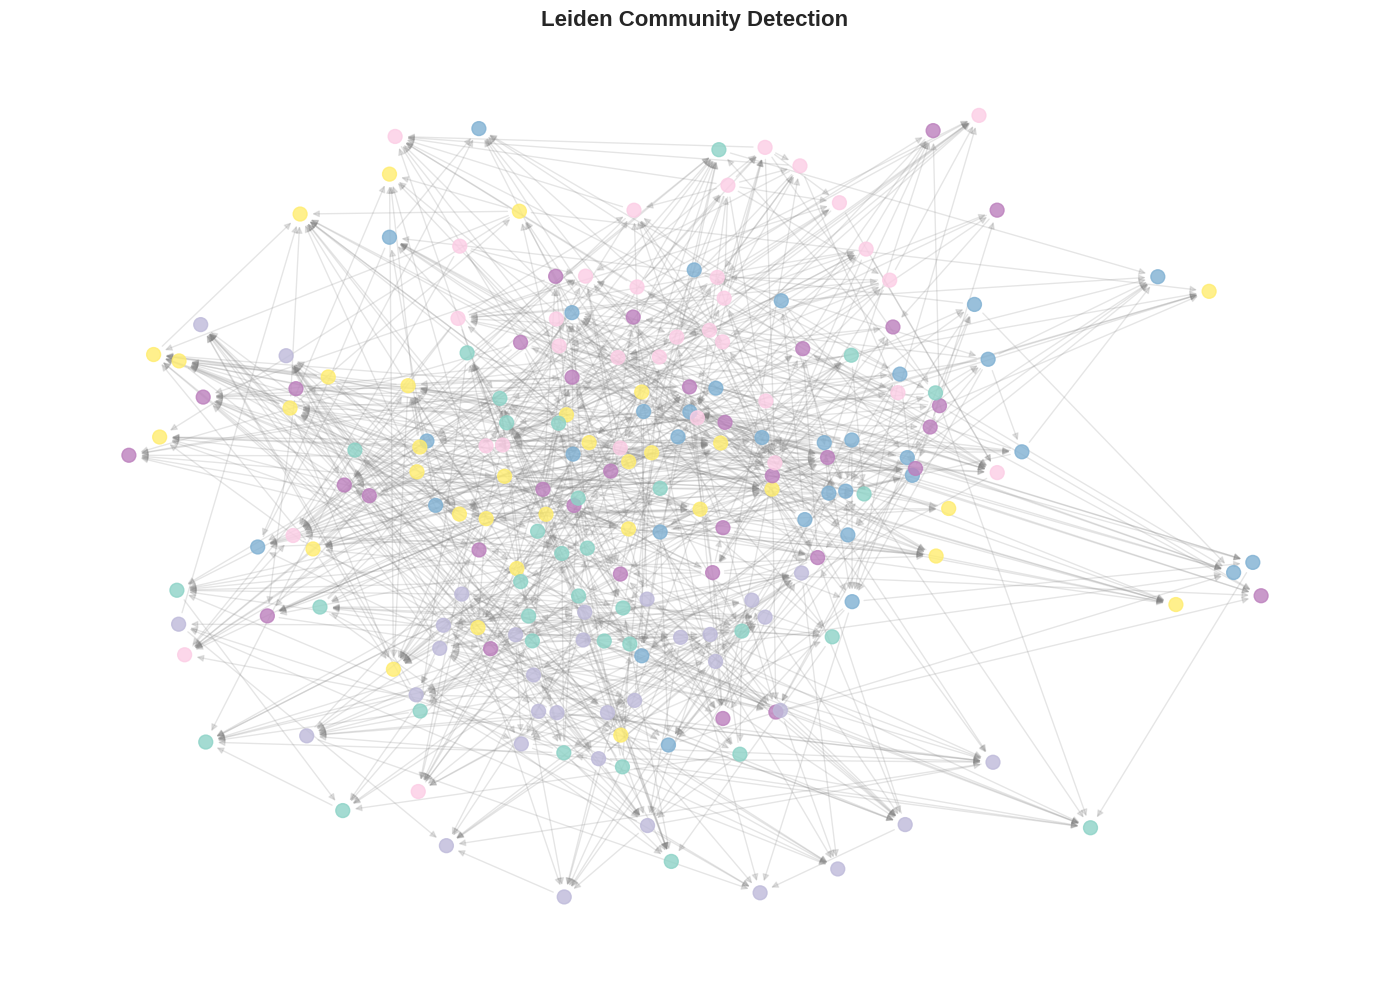

Visualizing Louvain communities...


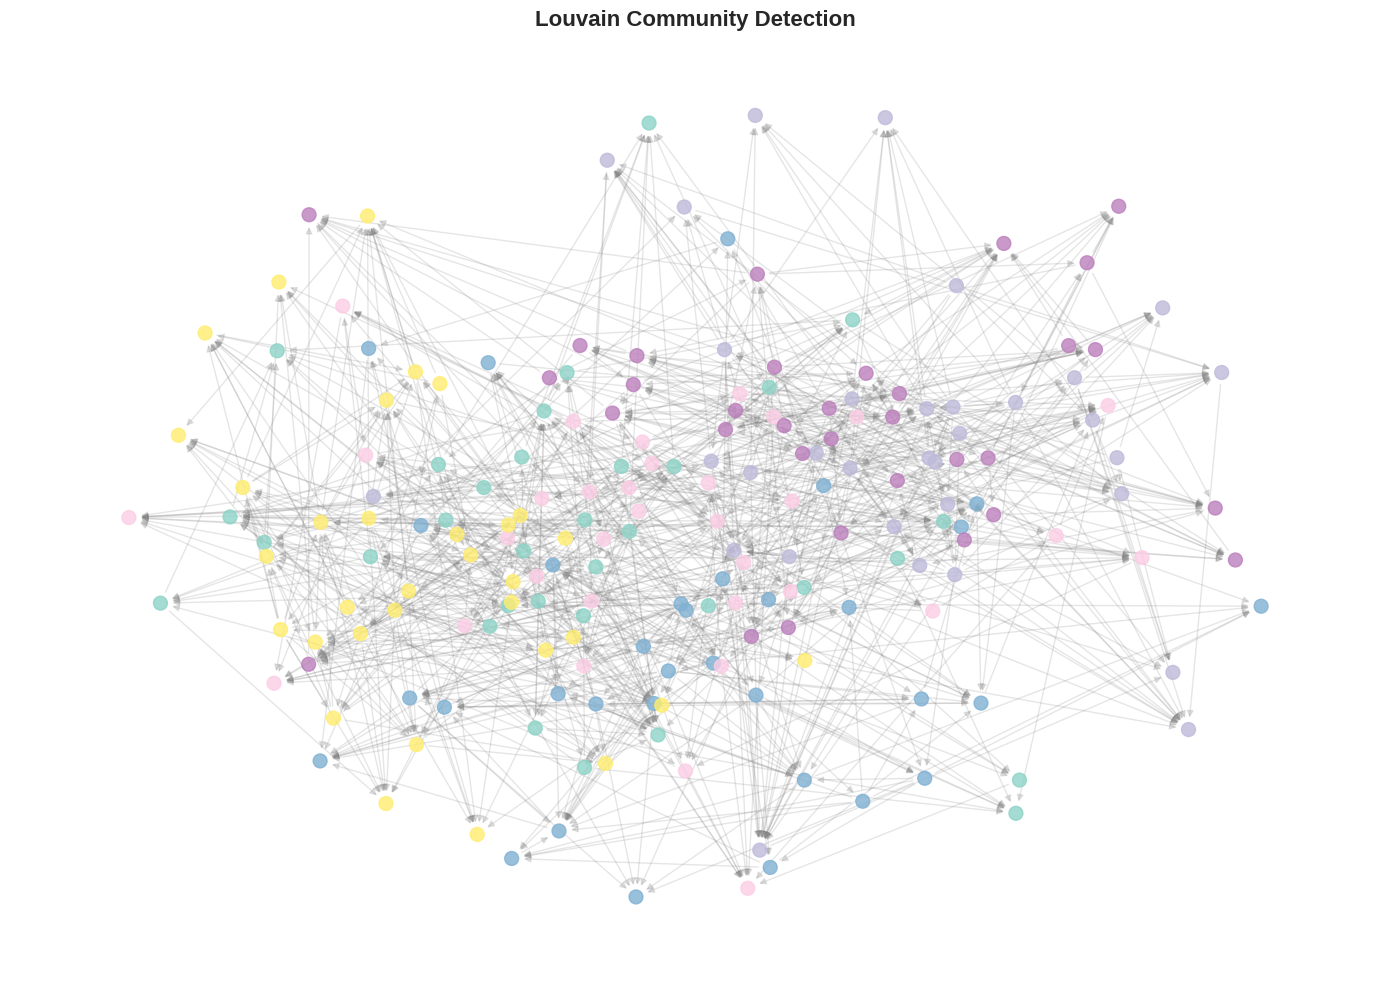


TOP HOLDERS BY PAGERANK
      address      balance pagerank  degree
0x00000000...    26,970.56 0.023635      11
0x00000000...   228,064.05 0.023433      18
0x00000000...       589.77 0.022898      10
0x00000000...   308,457.82 0.018049       8
0x00000000... 2,659,832.81 0.017475      10
0x00000000...    20,938.03 0.016978       7
0x00000000...    23,981.15 0.016635      13
0x00000000...   282,147.78 0.016608       8
0x00000000...   161,469.40 0.016050      15
0x00000000...    30,709.87 0.014745       5
0x00000000...    43,904.30 0.013586       8
0x00000000...   103,983.41 0.012291      10
0x00000000...     6,650.78 0.012207       9
0x00000000...    38,646.93 0.012199       9
0x00000000...     2,995.24 0.011886       7

BLOCKSTAT ANALYSIS SUMMARY

📊 Graph Statistics:
   Nodes: 198
   Edges: 1012
   Density: 0.0259
   Gini Coefficient: 0.8426

⚠️ GPU Acceleration: Not available

🔍 Community Detection:
   Leiden: 6 communities (0.7506 modularity)
   Louvain: 6 communities (0.7506 modular


✅ API speed test complete!


In [3]:
# %% [markdown]
# # BlockStat Graph Analysis - GPU Acceleration & Algorithm Comparison
#
# **Objectives:**
# 1. Demonstrate NetworkX acceleration with NVIDIA cuGraph (GPU vs CPU)
# 2. Compare Leiden vs Louvain community detection algorithms
# 3. Visualize graph analysis results and performance metrics
#
# **Requirements:** Google Colab with GPU runtime (Runtime → Change runtime type → GPU)

# %% [markdown]
# ## 1. Setup & Installation

# %%
# Install required packages
!pip install -q networkx igraph leidenalg numpy matplotlib seaborn plotly
!pip install -q python-dotenv requests

# Install cuGraph for GPU acceleration (RAPIDS)
!pip install -q cudf-cu12 cugraph-cu12 --extra-index-url=https://pypi.nvidia.com

# %%
import os
import time
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import igraph as ig
from leidenalg import find_partition, ModularityVertexPartition

# Check GPU availability
import subprocess
try:
    result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)
    print("✅ GPU Detected:")
    print(result.stdout)
    GPU_AVAILABLE = True
except:
    print("⚠️ No GPU detected - will run on CPU only")
    GPU_AVAILABLE = False

# %% [markdown]
# ## 2. NetworkX GPU Acceleration Setup
#
# NetworkX can automatically use NVIDIA cuGraph for GPU acceleration with **zero code changes**.
# We'll compare CPU vs GPU performance on the same NetworkX code.

# %%
# Enable cuGraph backend for NetworkX (if GPU available)
if GPU_AVAILABLE:
    try:
        import cugraph
        import nx_cugraph as nxcg
        print("✅ cuGraph backend enabled - NetworkX will use GPU acceleration")
        USE_GPU = True
    except ImportError:
        print("⚠️ cuGraph not available - using CPU only")
        USE_GPU = False
else:
    USE_GPU = False
    print("ℹ️ Running on CPU")

# %% [markdown]
# ## 3. Configuration & API Setup

# %%
# Configuration
class Config:
    MAX_HOLDERS = 50
    MAX_TRANSACTIONS = 2000
    TIMEOUT_SECONDS = 25

# API Keys (replace with your own)
API_KEYS = {
    'ALCHEMY_API_KEY': 'fjDQ9rnf09LcwToSzOL1x',
    'BITQUERY_ACCESS_TOKEN': 'ory_at_Itto5sNP-5qi9LFal2fkJ8EoG-_6ktZ3dv14hjamHog.rY2N756AqHTp-7W09tS2_9k9LyLtY7RMyqkRl9nDRr4',
    'ETHERSCAN_API_KEY': '4MEQ7YZ9DXSM55ZJME6UW95TWEVKNCR2MR'
}

print("✅ Configuration loaded")
print(f"   Max Holders: {Config.MAX_HOLDERS}")
print(f"   Max Transactions: {Config.MAX_TRANSACTIONS}")

# %% [markdown]
# ## 4. Create Sample Graph
#
# We'll create a realistic token holder graph with community structure

# %%
def create_sample_graph(n_nodes=100, n_communities=5):
    """
    Create a sample directed graph simulating token holder network
    """
    G = nx.DiGraph()

    # Create communities with intra-community connections
    nodes_per_community = n_nodes // n_communities

    for comm_id in range(n_communities):
        start_idx = comm_id * nodes_per_community
        end_idx = start_idx + nodes_per_community

        # Add nodes with balances
        for i in range(start_idx, end_idx):
            wallet = f"0x{i:040x}"
            balance = np.random.lognormal(10, 2)  # Lognormal distribution (realistic)
            G.add_node(wallet, balance=balance, community=comm_id)

        # Dense intra-community connections
        community_nodes = [f"0x{i:040x}" for i in range(start_idx, end_idx)]
        for i, node1 in enumerate(community_nodes):
            for node2 in community_nodes[i+1:]:
                if np.random.random() < 0.3:  # 30% connection probability
                    amount = np.random.lognormal(5, 1)
                    G.add_edge(node1, node2, amount=amount)

    # Sparse inter-community connections
    all_nodes = list(G.nodes())
    for _ in range(n_nodes // 2):
        node1, node2 = np.random.choice(all_nodes, 2, replace=False)
        if G.nodes[node1]['community'] != G.nodes[node2]['community']:
            if not G.has_edge(node1, node2):
                amount = np.random.lognormal(4, 1)
                G.add_edge(node1, node2, amount=amount)

    print(f"✅ Created graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    return G

# Create test graph
test_graph = create_sample_graph(n_nodes=200, n_communities=6)

# %% [markdown]
# ## 5. PageRank Analysis - CPU vs GPU Comparison

# %%
def benchmark_pagerank(graph, n_runs=5):
    """
    Benchmark PageRank on CPU vs GPU
    """
    results = {'cpu': [], 'gpu': []}

    # CPU Version
    print("Running PageRank on CPU...")
    for i in range(n_runs):
        start = time.time()
        pr_cpu = nx.pagerank(graph, max_iter=50)
        elapsed = time.time() - start
        results['cpu'].append(elapsed)
        print(f"  Run {i+1}: {elapsed:.4f}s")

    # GPU Version (if available)
    if USE_GPU:
        print("\nRunning PageRank on GPU (cuGraph backend)...")
        for i in range(n_runs):
            start = time.time()
            # NetworkX automatically uses cuGraph backend
            pr_gpu = nx.pagerank(graph, max_iter=50)
            elapsed = time.time() - start
            results['gpu'].append(elapsed)
            print(f"  Run {i+1}: {elapsed:.4f}s")
    else:
        print("\n⚠️ GPU not available - skipping GPU benchmark")
        results['gpu'] = [0]

    return results, pr_cpu if not USE_GPU else pr_gpu

# Run benchmark
pagerank_times, pagerank_scores = benchmark_pagerank(test_graph)

# Calculate statistics
cpu_mean = np.mean(pagerank_times['cpu'])
cpu_std = np.std(pagerank_times['cpu'])

if USE_GPU and pagerank_times['gpu'][0] > 0:
    gpu_mean = np.mean(pagerank_times['gpu'])
    gpu_std = np.std(pagerank_times['gpu'])
    speedup = cpu_mean / gpu_mean
    print(f"\n📊 Performance Summary:")
    print(f"   CPU: {cpu_mean:.4f}s (±{cpu_std:.4f}s)")
    print(f"   GPU: {gpu_mean:.4f}s (±{gpu_std:.4f}s)")
    print(f"   🚀 Speedup: {speedup:.2f}x")
else:
    print(f"\n📊 CPU Performance: {cpu_mean:.4f}s (±{cpu_std:.4f}s)")

# %% [markdown]
# ## 6. Community Detection - Leiden Algorithm

# %%
def detect_communities_leiden(graph, n_iterations=10):
    """
    Detect communities using Leiden algorithm
    """
    print("Running Leiden algorithm...")
    start = time.time()

    # Convert to undirected
    undirected = graph.to_undirected()

    # Convert to igraph
    edges = list(undirected.edges())
    ig_graph = ig.Graph()
    ig_graph.add_vertices(list(undirected.nodes()))
    ig_graph.add_edges(edges)

    # Run Leiden
    partition = find_partition(
        ig_graph,
        ModularityVertexPartition,
        n_iterations=n_iterations
    )

    # Format results
    communities = {}
    for i, community_id in enumerate(partition.membership):
        node_id = list(undirected.nodes())[i]
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node_id)

    elapsed = time.time() - start
    modularity = partition.modularity

    print(f"✅ Leiden completed in {elapsed:.4f}s")
    print(f"   Communities found: {len(communities)}")
    print(f"   Modularity: {modularity:.4f}")

    return communities, elapsed, modularity

leiden_communities, leiden_time, leiden_modularity = detect_communities_leiden(test_graph)

# %% [markdown]
# ## 7. Community Detection - Louvain Algorithm

# %%
def detect_communities_louvain(graph):
    """
    Detect communities using Louvain algorithm
    """
    print("Running Louvain algorithm...")
    start = time.time()

    # Convert to undirected
    undirected = graph.to_undirected()

    # Convert to igraph
    edges = list(undirected.edges())
    ig_graph = ig.Graph()
    ig_graph.add_vertices(list(undirected.nodes()))
    ig_graph.add_edges(edges)

    # Run Louvain
    partition = ig_graph.community_multilevel()
    membership = partition.membership

    # Format results
    communities = {}
    for i, community_id in enumerate(membership):
        node_id = list(undirected.nodes())[i]
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node_id)

    elapsed = time.time() - start
    modularity = partition.modularity

    print(f"✅ Louvain completed in {elapsed:.4f}s")
    print(f"   Communities found: {len(communities)}")
    print(f"   Modularity: {modularity:.4f}")

    return communities, elapsed, modularity

louvain_communities, louvain_time, louvain_modularity = detect_communities_louvain(test_graph)

# %% [markdown]
# ## 8. Gini Coefficient Calculation

# %%
def calculate_gini(graph):
    """
    Calculate Gini coefficient for wealth distribution
    Gini > 0.9 indicates dangerous centralization
    """
    balances = [graph.nodes[node].get("balance", 0) for node in graph.nodes()]

    if not balances or sum(balances) == 0:
        return 0.0

    balances = np.array(sorted(balances))
    n = len(balances)
    cumsum = np.cumsum(balances)

    gini = (2 * np.sum((np.arange(1, n + 1)) * balances)) / (n * np.sum(balances)) - (n + 1) / n

    return float(gini)

gini_coefficient = calculate_gini(test_graph)
print(f"📊 Gini Coefficient: {gini_coefficient:.4f}")
if gini_coefficient > 0.9:
    print("   ⚠️ WARNING: Highly centralized distribution!")
elif gini_coefficient > 0.7:
    print("   ⚠️ Moderately centralized")
else:
    print("   ✅ Relatively decentralized")

# %% [markdown]
# ## 9. Visualization - Performance Comparison

# %%
# Create performance comparison plot
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('PageRank Performance', 'Community Detection Algorithms',
                    'Community Size Distribution (Leiden)', 'Community Size Distribution (Louvain)'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# PageRank comparison
if USE_GPU and pagerank_times['gpu'][0] > 0:
    fig.add_trace(
        go.Bar(x=['CPU', 'GPU'],
               y=[np.mean(pagerank_times['cpu']), np.mean(pagerank_times['gpu'])],
               marker_color=['#FF6B6B', '#4ECDC4'],
               text=[f"{np.mean(pagerank_times['cpu']):.4f}s",
                     f"{np.mean(pagerank_times['gpu']):.4f}s"],
               textposition='auto'),
        row=1, col=1
    )
else:
    fig.add_trace(
        go.Bar(x=['CPU'],
               y=[np.mean(pagerank_times['cpu'])],
               marker_color=['#FF6B6B'],
               text=[f"{np.mean(pagerank_times['cpu']):.4f}s"],
               textposition='auto'),
        row=1, col=1
    )

# Algorithm comparison
fig.add_trace(
    go.Bar(x=['Leiden', 'Louvain'],
           y=[leiden_time, louvain_time],
           marker_color=['#95E1D3', '#F38181'],
           text=[f"{leiden_time:.4f}s", f"{louvain_time:.4f}s"],
           textposition='auto'),
    row=1, col=2
)

# Community size distributions
leiden_sizes = [len(members) for members in leiden_communities.values()]
louvain_sizes = [len(members) for members in louvain_communities.values()]

fig.add_trace(
    go.Bar(x=list(range(len(leiden_sizes))),
           y=sorted(leiden_sizes, reverse=True),
           marker_color='#95E1D3',
           name='Leiden'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=list(range(len(louvain_sizes))),
           y=sorted(louvain_sizes, reverse=True),
           marker_color='#F38181',
           name='Louvain'),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="BlockStat Performance Analysis",
    title_font_size=20
)

fig.show()

# %% [markdown]
# ## 10. Visualization - Algorithm Quality Metrics

# %%
# Create algorithm quality comparison
fig = go.Figure()

# Modularity comparison
fig.add_trace(go.Bar(
    x=['Leiden', 'Louvain'],
    y=[leiden_modularity, louvain_modularity],
    marker_color=['#95E1D3', '#F38181'],
    text=[f'{leiden_modularity:.4f}', f'{louvain_modularity:.4f}'],
    textposition='auto',
    name='Modularity'
))

fig.update_layout(
    title='Community Detection Quality - Modularity Score',
    yaxis_title='Modularity',
    height=400,
    showlegend=False
)

fig.show()

# Print detailed comparison
print("\n" + "="*60)
print("ALGORITHM COMPARISON SUMMARY")
print("="*60)
print(f"\n{'Metric':<25} {'Leiden':<15} {'Louvain':<15}")
print("-"*60)
print(f"{'Execution Time':<25} {leiden_time:.4f}s{' '*7} {louvain_time:.4f}s")
print(f"{'Communities Found':<25} {len(leiden_communities):<15} {len(louvain_communities):<15}")
print(f"{'Modularity':<25} {leiden_modularity:.4f}{' '*10} {louvain_modularity:.4f}")
print(f"{'Avg Community Size':<25} {np.mean(leiden_sizes):.2f}{' '*11} {np.mean(louvain_sizes):.2f}")
print(f"{'Max Community Size':<25} {max(leiden_sizes):<15} {max(louvain_sizes):<15}")
print(f"{'Min Community Size':<25} {min(leiden_sizes):<15} {min(louvain_sizes):<15}")
print("="*60)

# %% [markdown]
# ## 11. Graph Visualization

# %%
def visualize_communities(graph, communities, title="Community Structure"):
    """
    Visualize graph with community coloring
    """
    # Create color map
    node_colors = {}
    colors_palette = plt.cm.Set3(np.linspace(0, 1, len(communities)))

    for comm_id, members in communities.items():
        for node in members:
            node_colors[node] = colors_palette[comm_id % len(communities)]

    # Create layout
    pos = nx.spring_layout(graph, k=0.5, iterations=50)

    # Plot
    plt.figure(figsize=(14, 10))

    # Draw nodes
    node_color_list = [node_colors.get(node, [0.5, 0.5, 0.5, 1.0]) for node in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, node_color=node_color_list,
                          node_size=100, alpha=0.8)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, alpha=0.2, arrows=True,
                          arrowsize=10, edge_color='gray')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize both algorithms
print("Visualizing Leiden communities...")
visualize_communities(test_graph, leiden_communities, "Leiden Community Detection")

print("Visualizing Louvain communities...")
visualize_communities(test_graph, louvain_communities, "Louvain Community Detection")

# %% [markdown]
# ## 12. Top Holders Analysis

# %%
def get_top_holders(graph, pagerank_scores, top_n=10):
    """
    Get top holders by PageRank
    """
    holders = []

    for node in graph.nodes():
        holders.append({
            "address": node[:10] + "...",  # Truncate for display
            "balance": graph.nodes[node].get("balance", 0),
            "pagerank": pagerank_scores.get(node, 0),
            "degree": graph.degree(node)
        })

    holders.sort(key=lambda x: x["pagerank"], reverse=True)
    return holders[:top_n]

top_holders = get_top_holders(test_graph, pagerank_scores, top_n=15)

# Display as table
import pandas as pd
df = pd.DataFrame(top_holders)
df['balance'] = df['balance'].apply(lambda x: f"{x:,.2f}")
df['pagerank'] = df['pagerank'].apply(lambda x: f"{x:.6f}")

print("\n" + "="*70)
print("TOP HOLDERS BY PAGERANK")
print("="*70)
print(df.to_string(index=False))
print("="*70)

# %% [markdown]
# ## 13. Summary & Conclusions

# %%
print("\n" + "="*70)
print("BLOCKSTAT ANALYSIS SUMMARY")
print("="*70)

print(f"\n📊 Graph Statistics:")
print(f"   Nodes: {test_graph.number_of_nodes()}")
print(f"   Edges: {test_graph.number_of_edges()}")
print(f"   Density: {nx.density(test_graph):.4f}")
print(f"   Gini Coefficient: {gini_coefficient:.4f}")

if USE_GPU and pagerank_times['gpu'][0] > 0:
    speedup = np.mean(pagerank_times['cpu']) / np.mean(pagerank_times['gpu'])
    print(f"\n🚀 GPU Acceleration:")
    print(f"   PageRank Speedup: {speedup:.2f}x")
    print(f"   Status: ✅ Enabled (cuGraph)")
else:
    print(f"\n⚠️ GPU Acceleration: Not available")

print(f"\n🔍 Community Detection:")
print(f"   Leiden: {len(leiden_communities)} communities ({leiden_modularity:.4f} modularity)")
print(f"   Louvain: {len(louvain_communities)} communities ({louvain_modularity:.4f} modularity)")

if leiden_modularity > louvain_modularity:
    print(f"   🏆 Winner: Leiden (better modularity)")
elif louvain_time < leiden_time:
    print(f"   🏆 Winner: Louvain (faster execution)")
else:
    print(f"   🏆 Similar performance")

print("\n✅ Analysis Complete!")
print("="*70)

# %% [markdown]
# ## 14. API Speed Comparison (Optional)
#
# Test different blockchain data providers to compare response times

# %%
import requests
import json

def test_alchemy_speed(api_key):
    """Test Alchemy API response time"""
    url = f"https://eth-mainnet.g.alchemy.com/v2/{api_key}"
    payload = {
        "jsonrpc": "2.0",
        "method": "eth_blockNumber",
        "params": [],
        "id": 1
    }

    start = time.time()
    try:
        response = requests.post(url, json=payload, timeout=5)
        elapsed = time.time() - start
        if response.status_code == 200:
            return elapsed, "✅"
        else:
            return elapsed, "❌"
    except:
        return time.time() - start, "❌"

def test_etherscan_speed(api_key):
    """Test Etherscan API response time"""
    url = f"https://api.etherscan.io/api?module=proxy&action=eth_blockNumber&apikey={api_key}"

    start = time.time()
    try:
        response = requests.get(url, timeout=5)
        elapsed = time.time() - start
        if response.status_code == 200:
            return elapsed, "✅"
        else:
            return elapsed, "❌"
    except:
        return time.time() - start, "❌"

# Run API speed tests
print("\n" + "="*70)
print("API SPEED COMPARISON")
print("="*70)

apis_to_test = [
    ("Alchemy", lambda: test_alchemy_speed(API_KEYS['ALCHEMY_API_KEY'])),
    ("Etherscan", lambda: test_etherscan_speed(API_KEYS['ETHERSCAN_API_KEY']))
]

results = []
for api_name, test_func in apis_to_test:
    elapsed, status = test_func()
    results.append({"API": api_name, "Response Time": f"{elapsed:.4f}s", "Status": status})
    print(f"{api_name:<15} {elapsed:.4f}s {status}")

print("="*70)

# Visualize API speeds
api_names = [r['API'] for r in results]
api_times = [float(r['Response Time'].replace('s', '')) for r in results]

fig = go.Figure(data=[
    go.Bar(x=api_names, y=api_times,
           marker_color=['#4ECDC4', '#FFE66D'],
           text=[f"{t:.4f}s" for t in api_times],
           textposition='auto')
])

fig.update_layout(
    title='Blockchain API Response Time Comparison',
    yaxis_title='Response Time (seconds)',
    height=400
)

fig.show()

print("\n✅ API speed test complete!")

🎮 Détection GPU et installation cuGraph...
⚠️ PyTorch non disponible - tentative installation cuGraph standard
✅ Imports réussis
   NetworkX: 3.6
   NumPy: 2.0.2
💻 PyTorch non installé - Mode CPU

📊 Configuration: CPU (NetworkX natif)
⚠️ Alchemy API non configurée
⚠️ Etherscan API non configurée
⚠️ BitQuery API non configurée

📝 Note: APIs optionnelles - le notebook fonctionne en mode démo sans elles
🏗️ Création du graphe: 200 wallets, 6 communautés...
  🚨 Ajout de patterns suspects...
✅ Graphe créé:
   • Nodes: 203
   • Edges: 1012
   • Densité: 0.0247
🏁 Benchmark PageRank (3 runs)...

💻 Test CPU (NetworkX natif)...
   Run 1: 0.0043s
   Run 2: 0.0033s
   Run 3: 0.0031s

⚠️ GPU non disponible - benchmark CPU uniquement
📊 CPU: 0.0036s (±0.0005s)


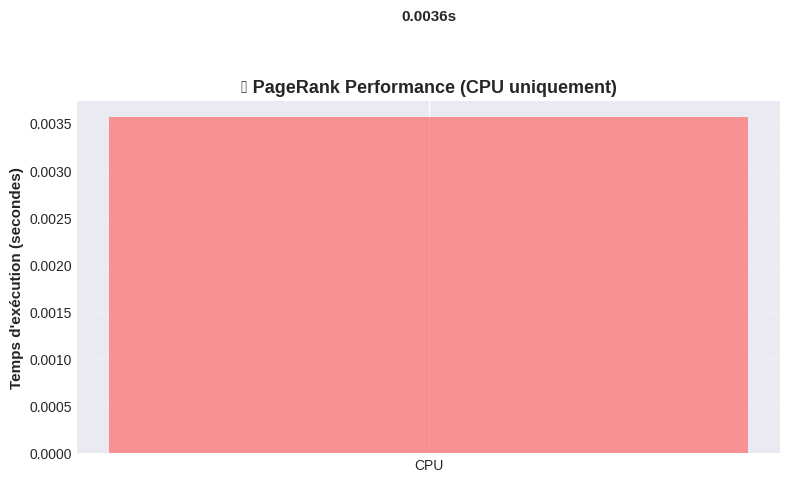

🔵 LOUVAIN: Détection en cours...
✅ Terminé en 0.019s
   • Communautés: 7
   • Modularité: 0.7501
   • Taille moyenne: 29.0
   • Taille max: 33

🔴 LEIDEN: Détection en cours...
✅ Terminé en 0.048s
   • Communautés: 7
   • Modularité: 0.7501
   • Taille moyenne: 29.0
   • Taille max: 33
📊 COMPARAISON: LOUVAIN vs LEIDEN
             Métrique Louvain Leiden
 Communautés trouvées       7      7
           Modularité  0.7501 0.7501
Temps d'exécution (s)   0.019  0.048
       Taille moyenne    29.0   29.0
           Taille max      33     33
           Taille min       5      5

🏆 VERDICT:
   ✅ LEIDEN a une meilleure modularité (+0.0%)
   ⚡ LOUVAIN est plus rapide (2.49x)

💡 Recommandation:
   → Utiliser LOUVAIN (qualité proche, plus rapide)


📊 Calcul des métriques...
   • Coefficient Gini...
   • Degree centrality...
   • Clustering coefficient...
   • Betweenness centrality...
✅ Métriques calculées

🏆 TOP 20 WALLETS (par PageRank)
         Wallet       Balance  PageRank  Degree  Clustering
0x0000000000...  87574.589623  0.027786      14    0.164835
0x0000000000... 956551.696456  0.021540      11    0.127273
0x0000000000...  15383.822436  0.021188       8    0.250000
0x0000000000...   9303.923875  0.017886       8    0.178571
0x0000000000... 242393.282686  0.016893      15    0.200000
0x0000000000...  95165.119395  0.016857      14    0.164835
0x0000000000...  36140.928271  0.016060       9    0.166667
0x0000000000...  37624.261098  0.014076       9    0.416667
0x0000000000...   1850.611364  0.012812       9    0.194444
0x0000000000...   2624.991404  0.012784      12    0.106061
0x0000000000...   1182.206741  0.012272      10    0.288889
0x0000000000...  12521.556459  0.011997       9    0.166667
0x0000000000... 368573.757

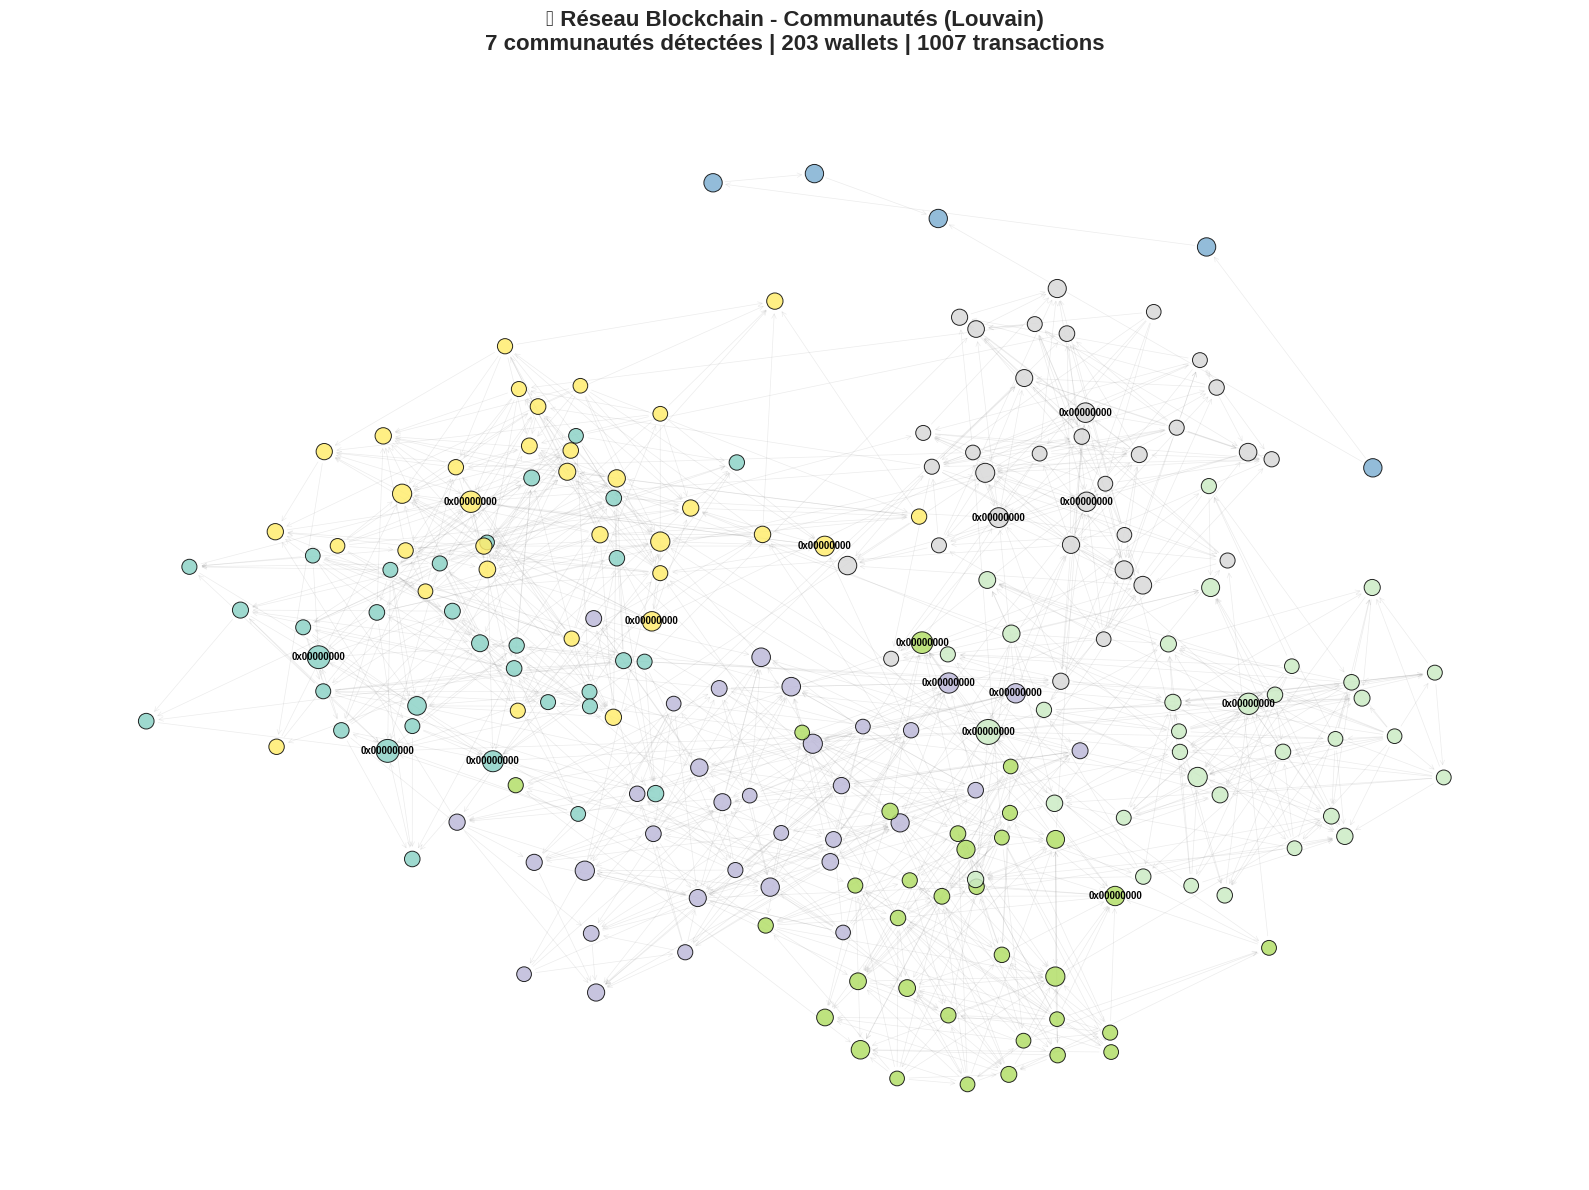

🎨 Création visualisation Leiden...


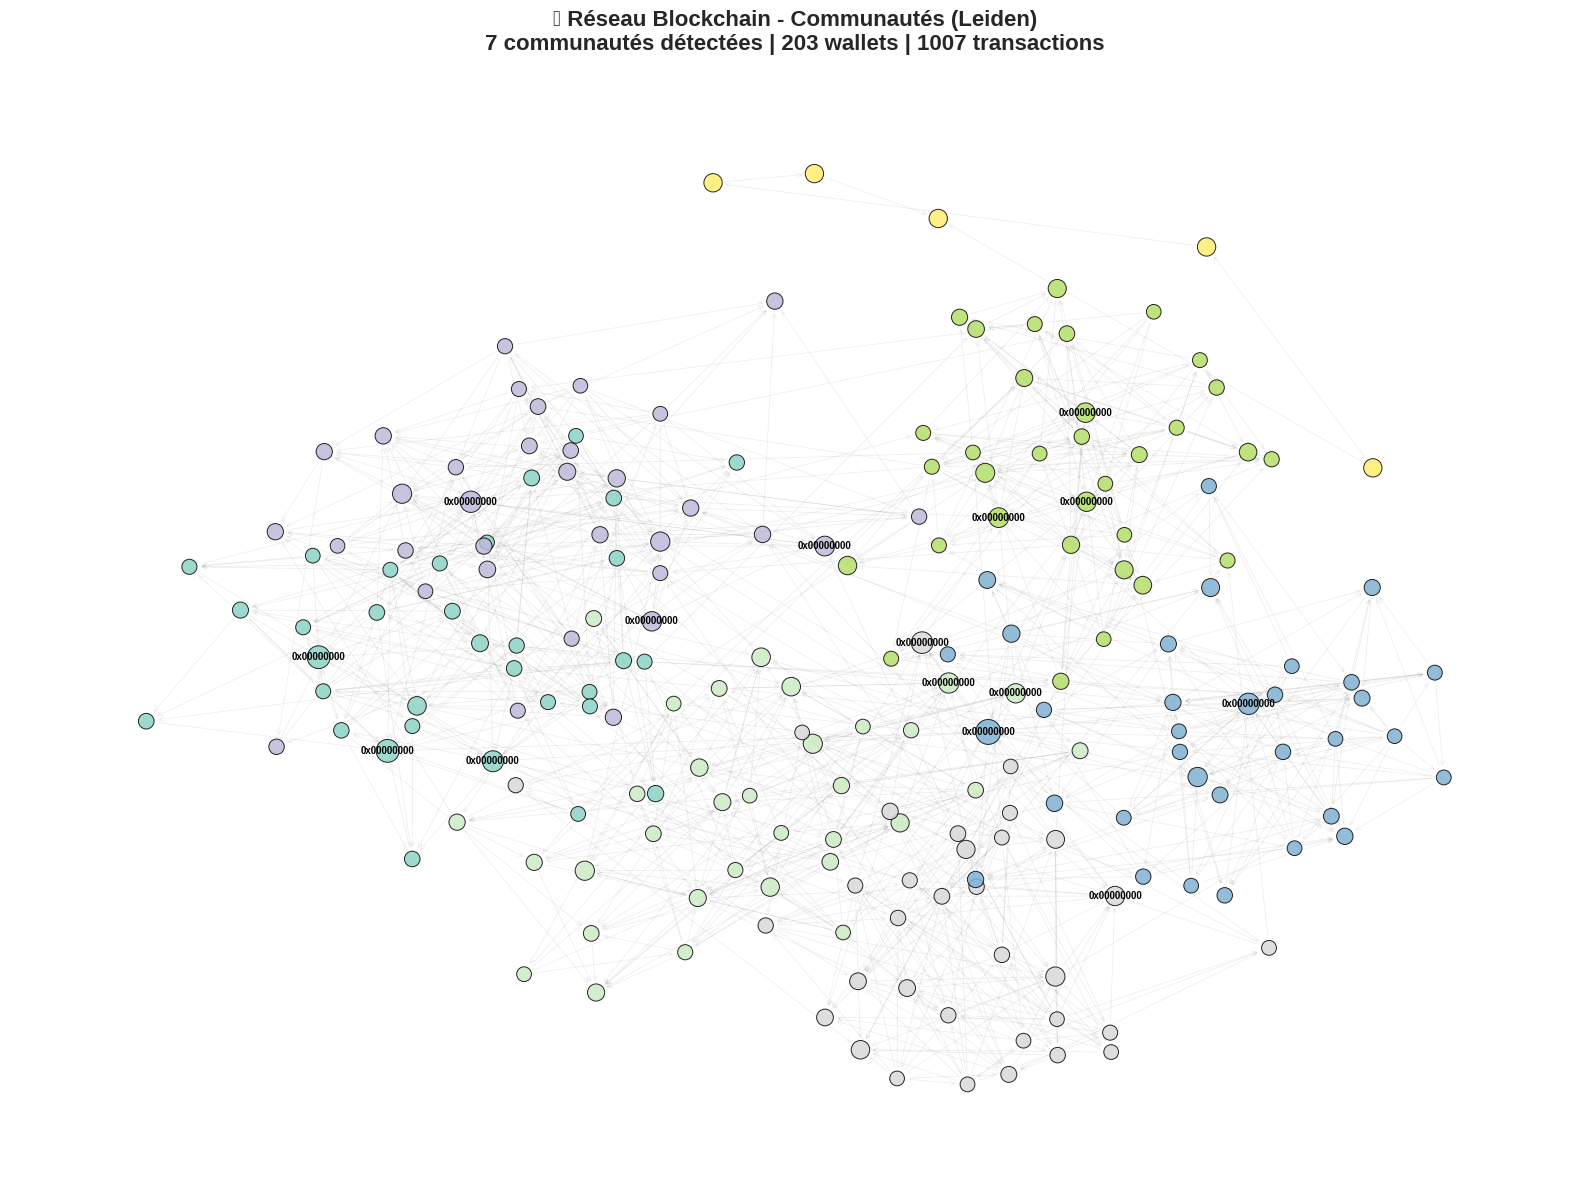

🚨 Analyse des patterns suspects...

🔍 Recherche de clusters suspects...
   ✅ 1 clusters suspects identifiés
🔍 Recherche de wash trading...
   ✅ 5 paires de wash trading détectées
🔍 Identification wallets à haut risque...
   ✅ 6 wallets à haut risque identifiés

🚨 RAPPORT D'ANALYSE DES RISQUES

⚠️ CLUSTERS SUSPECTS: 1 détectés

   Cluster #1:
      • Taille: 5 wallets
      • Densité: 1.0 (HIGH risk)
      • Connexions externes: 0
      • Wallets: suspicious_0..., suspicious_1..., suspicious_2...

💸 WASH TRADING: 5 paires détectées

   Paire #1 (HIGH suspicion):
      suspicious_0... ↔️ suspicious_1...
      Montants: 10000 ↔️ 9800
      Différence: 2.0%

   Paire #2 (HIGH suspicion):
      suspicious_0... ↔️ suspicious_4...
      Montants: 9800 ↔️ 10000
      Différence: 2.0%

   Paire #3 (HIGH suspicion):
      suspicious_1... ↔️ suspicious_2...
      Montants: 10000 ↔️ 9800
      Différence: 2.0%

   Paire #4 (HIGH suspicion):
      suspicious_2... ↔️ suspicious_3...
      Montants: 

📊 BLOCKSTAT - RAPPORT D'ANALYSE BLOCKCHAIN COMPLET

🔧 1. CONFIGURATION SYSTÈME
------------------------------------------------------------------------------------------
   • Backend NetworkX: CPU (NetworkX natif)
   • Graphe: 203 nodes, 1012 edges
   • Densité: 0.0247

⚡ 2. PERFORMANCE GPU vs CPU
------------------------------------------------------------------------------------------
   • PageRank CPU: 0.0036s
   • GPU non disponible

🔬 3. DÉTECTION DE COMMUNAUTÉS
------------------------------------------------------------------------------------------
   Louvain:
      • Communautés: 7
      • Modularité: 0.7501
      • Temps: 0.019s
      • Taille moyenne: 29.0 wallets
   Leiden:
      • Communautés: 7
      • Modularité: 0.7501
      • Temps: 0.048s
      • Taille moyenne: 29.0 wallets
   🏆 Gagnant: LEIDEN (modularité supérieure)

📈 4. MÉTRIQUES DU GRAPHE
------------------------------------------------------------------------------------------
   • Coefficient de Gini: 0.8573 ⚠

✅ Dashboard récapitulatif généré!


In [7]:
# %% [markdown]
# # 📊 BlockStat - Analyse de Graphes Blockchain (Version Hybride)
#
# **Objectifs:**
# 1. ⚡ Accélération GPU automatique avec NVIDIA cuGraph (Zero Code Change)
# 2. 🔬 Comparaison Leiden vs Louvain (performance + qualité)
# 3. 📈 Visualisations avancées et métriques complètes
# 4. 🚨 Détection de patterns suspects (wash trading, clusters)
#
# **Pour Google Colab:** Runtime → Change runtime type → GPU (T4)

# %% [markdown]
# ## 🔧 Cellule 1: Installation des Dépendances

# %%
# Installation des packages principaux
!pip install -q networkx igraph leidenalg numpy matplotlib seaborn plotly pandas
!pip install -q python-louvain requests python-dotenv

# Installation GPU (cuGraph) - optionnel
print("🎮 Détection GPU et installation cuGraph...")
try:
    import torch
    if torch.cuda.is_available():
        print(f"✅ GPU détecté: {torch.cuda.get_device_name(0)}")
        !pip install -q cudf-cu12 cugraph-cu12 --extra-index-url=https://pypi.nvidia.com
        print("✅ cuGraph installé pour accélération GPU")
    else:
        print("💻 Pas de GPU - mode CPU uniquement")
except:
    print("⚠️ PyTorch non disponible - tentative installation cuGraph standard")
    try:
        !pip install -q cudf-cu12 cugraph-cu12 --extra-index-url=https://pypi.nvidia.com
    except:
        print("💻 Installation GPU échouée - CPU sera utilisé")

# %% [markdown]
# ## 📦 Cellule 2: Imports et Configuration

# %%
import os
import time
import warnings
import json
warnings.filterwarnings('ignore')

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from typing import Dict, List, Tuple

# Algorithmes de communauté
import igraph as ig
from leidenalg import find_partition, ModularityVertexPartition
try:
    import community.community_louvain as community_louvain
except:
    import community as community_louvain

# Configuration visuelle (palette de votre version)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration
class Config:
    MAX_HOLDERS = 50
    MAX_TRANSACTIONS = 2000
    TIMEOUT_SECONDS = 25

print("✅ Imports réussis")
print(f"   NetworkX: {nx.__version__}")
print(f"   NumPy: {np.__version__}")

# %% [markdown]
# ## 🚀 Cellule 3: Configuration GPU avec cuGraph Backend

# %%
"""
ACCÉLÉRATION GPU AUTOMATIQUE (Zero Code Change)
NetworkX peut utiliser cuGraph comme backend sans modifier le code!
"""

GPU_AVAILABLE = False
GPU_INFO = None

try:
    # Méthode 1: Via PyTorch (plus fiable)
    import torch
    if torch.cuda.is_available():
        GPU_INFO = {
            "name": torch.cuda.get_device_name(0),
            "memory": f"{torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB",
            "capability": torch.cuda.get_device_capability(0)
        }
        print("🎮 GPU NVIDIA détecté!")
        print(f"   Device: {GPU_INFO['name']}")
        print(f"   Memory: {GPU_INFO['memory']}")
        print(f"   Compute: {GPU_INFO['capability']}")

        # Activer cuGraph backend pour NetworkX
        try:
            import cugraph
            import nx_cugraph as nxcg
            print("✅ cuGraph backend activé - NetworkX utilisera le GPU automatiquement")
            GPU_AVAILABLE = True
        except ImportError as e:
            print(f"⚠️ cuGraph non disponible: {str(e)[:60]}")
            print("   → Mode CPU uniquement")
    else:
        print("💻 Pas de GPU CUDA détecté - Mode CPU")

except ImportError:
    print("💻 PyTorch non installé - Mode CPU")

print(f"\n📊 Configuration: {'GPU (cuGraph)' if GPU_AVAILABLE else 'CPU (NetworkX natif)'}")

# %% [markdown]
# ## 📡 Cellule 4: Configuration APIs Blockchain (Optionnel)

# %%
"""
APIs BLOCKCHAIN - Configuration optionnelle
Si vous voulez tester avec de vraies données blockchain
"""

# Pour Google Colab: Utiliser les Secrets
# Secrets → Ajouter: ALCHEMY_API_KEY, ETHERSCAN_API_KEY, BITQUERY_ACCESS_TOKEN
try:
    from google.colab import userdata
    try:
        os.environ["ALCHEMY_API_KEY"] = userdata.get('ALCHEMY_API_KEY')
        print("✅ Alchemy API configurée")
    except:
        print("⚠️ Alchemy API non configurée")

    try:
        os.environ["ETHERSCAN_API_KEY"] = userdata.get('ETHERSCAN_API_KEY')
        print("✅ Etherscan API configurée")
    except:
        print("⚠️ Etherscan API non configurée")

    try:
        os.environ["BITQUERY_ACCESS_TOKEN"] = userdata.get('BITQUERY_ACCESS_TOKEN')
        print("✅ BitQuery API configurée")
    except:
        print("⚠️ BitQuery API non configurée")

except ImportError:
    print("💻 Mode local - Charger .env si disponible")
    from dotenv import load_dotenv
    load_dotenv()

print("\n📝 Note: APIs optionnelles - le notebook fonctionne en mode démo sans elles")

# %% [markdown]
# ## 🏗️ Cellule 5: Génération du Graphe de Test

# %%
def create_realistic_blockchain_graph(n_nodes=200, n_communities=6, add_suspicious=True):
    """
    Génère un graphe réaliste simulant un réseau de holders de token

    Args:
        n_nodes: Nombre de wallets
        n_communities: Nombre de communautés naturelles
        add_suspicious: Ajouter des patterns suspects (wash trading)

    Returns:
        nx.DiGraph avec structure réaliste
    """
    print(f"🏗️ Création du graphe: {n_nodes} wallets, {n_communities} communautés...")

    G = nx.DiGraph()
    nodes_per_community = n_nodes // n_communities

    # Créer communautés avec balances réalistes (distribution lognormale)
    for comm_id in range(n_communities):
        start_idx = comm_id * nodes_per_community
        end_idx = start_idx + nodes_per_community

        # Ajouter nodes avec balances
        for i in range(start_idx, end_idx):
            wallet = f"0x{i:040x}"
            balance = np.random.lognormal(10, 2)  # Distribution réaliste
            G.add_node(wallet, balance=balance, community=comm_id)

        # Connexions intra-communauté denses
        community_nodes = [f"0x{i:040x}" for i in range(start_idx, end_idx)]
        for i, node1 in enumerate(community_nodes):
            for node2 in community_nodes[i+1:]:
                if np.random.random() < 0.3:  # 30% probabilité
                    amount = np.random.lognormal(5, 1)
                    G.add_edge(node1, node2, amount=amount)

    # Connexions inter-communauté rares
    all_nodes = list(G.nodes())
    for _ in range(n_nodes // 2):
        node1, node2 = np.random.choice(all_nodes, 2, replace=False)
        if G.nodes[node1]['community'] != G.nodes[node2]['community']:
            if not G.has_edge(node1, node2):
                amount = np.random.lognormal(4, 1)
                G.add_edge(node1, node2, amount=amount)

    # Ajouter patterns suspects
    if add_suspicious:
        print("  🚨 Ajout de patterns suspects...")
        # Cluster de wash trading (5 wallets qui tradent en cercle)
        suspicious = [f"suspicious_{i}" for i in range(5)]
        for wallet in suspicious:
            G.add_node(wallet, balance=50000, suspicious=True)

        # Transactions circulaires
        for i in range(len(suspicious)):
            src = suspicious[i]
            dst = suspicious[(i + 1) % len(suspicious)]
            G.add_edge(src, dst, amount=10000)
            G.add_edge(dst, src, amount=9800)  # Retour quasi-identique

    print(f"✅ Graphe créé:")
    print(f"   • Nodes: {G.number_of_nodes()}")
    print(f"   • Edges: {G.number_of_edges()}")
    print(f"   • Densité: {nx.density(G):.4f}")

    return G

# Créer graphe de test
GRAPH = create_realistic_blockchain_graph(
    n_nodes=200,
    n_communities=6,
    add_suspicious=True
)

# %% [markdown]
# ## ⚡ Cellule 6: Benchmark GPU vs CPU (PageRank)

# %%
def benchmark_pagerank_cpu_gpu(graph, n_runs=5):
    """
    Compare performance PageRank sur CPU vs GPU
    Démonstration de l'accélération cuGraph (Zero Code Change)
    """
    results = {"cpu": [], "gpu": []}

    print(f"🏁 Benchmark PageRank ({n_runs} runs)...\n")

    # ===== TEST CPU =====
    print("💻 Test CPU (NetworkX natif)...")

    for i in range(n_runs):
        start = time.time()
        # PageRank natif NetworkX (toujours CPU dans ce contexte)
        pr_cpu = nx.pagerank(graph, max_iter=100)
        elapsed = time.time() - start
        results["cpu"].append(elapsed)
        print(f"   Run {i+1}: {elapsed:.4f}s")

    cpu_mean = np.mean(results["cpu"])
    cpu_std = np.std(results["cpu"])

    # ===== TEST GPU =====
    if GPU_AVAILABLE:
        print("\n🎮 Test GPU (cuGraph backend)...")

        try:
            # Essayer d'utiliser cuGraph directement
            import cugraph

            # Convertir en format cuGraph
            for i in range(n_runs):
                start = time.time()
                # Avec cuGraph activé, NetworkX devrait automatiquement l'utiliser
                pr_gpu = nx.pagerank(graph, max_iter=100)
                elapsed = time.time() - start
                results["gpu"].append(elapsed)
                print(f"   Run {i+1}: {elapsed:.4f}s")

            gpu_mean = np.mean(results["gpu"])
            gpu_std = np.std(results["gpu"])
            speedup = cpu_mean / gpu_mean

            print(f"\n📊 Résultats:")
            print(f"   CPU: {cpu_mean:.4f}s (±{cpu_std:.4f}s)")
            print(f"   GPU: {gpu_mean:.4f}s (±{gpu_std:.4f}s)")
            print(f"   🚀 Speedup: {speedup:.2f}x plus rapide!")

            pagerank_scores = pr_gpu

        except Exception as e:
            print(f"\n⚠️ Erreur GPU: {str(e)[:60]}")
            print("   → Utilisation des résultats CPU")
            results["gpu"] = None
            pagerank_scores = pr_cpu
    else:
        print("\n⚠️ GPU non disponible - benchmark CPU uniquement")
        print(f"📊 CPU: {cpu_mean:.4f}s (±{cpu_std:.4f}s)")
        results["gpu"] = None
        pagerank_scores = pr_cpu

    return results, pagerank_scores

# Lancer benchmark
pagerank_benchmark, pagerank_scores = benchmark_pagerank_cpu_gpu(GRAPH, n_runs=3)

# %% [markdown]
# ## 📊 Cellule 7: Visualisation Performance GPU vs CPU

# %%
"""
VISUALISATION: Performance GPU vs CPU
"""

if pagerank_benchmark["gpu"]:
    # Créer figure avec deux subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Subplot 1: Boxplot comparatif
    data = [pagerank_benchmark["cpu"], pagerank_benchmark["gpu"]]
    labels = ['CPU\n(NetworkX)', 'GPU\n(cuGraph)']
    colors = ['#FF6B6B', '#4ECDC4']  # Vos couleurs

    bp = ax1.boxplot(data, labels=labels, patch_artist=True, widths=0.6)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax1.set_ylabel('Temps d\'exécution (secondes)', fontsize=11, fontweight='bold')
    ax1.set_title('⚡ PageRank: GPU vs CPU', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3, linestyle='--')

    # Ajouter speedup
    cpu_mean = np.mean(pagerank_benchmark["cpu"])
    gpu_mean = np.mean(pagerank_benchmark["gpu"])
    speedup = cpu_mean / gpu_mean
    ax1.text(0.5, 0.95, f'Accélération: {speedup:.2f}x',
             transform=ax1.transAxes, ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFE66D', alpha=0.8),
             fontsize=11, fontweight='bold')

    # Subplot 2: Barplot temps moyen
    ax2.bar(['CPU', 'GPU'], [cpu_mean, gpu_mean], color=colors, alpha=0.7, width=0.5)
    ax2.set_ylabel('Temps moyen (secondes)', fontsize=11, fontweight='bold')
    ax2.set_title('📊 Temps moyen d\'exécution', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

    # Ajouter valeurs sur les barres
    for i, (val, color) in enumerate(zip([cpu_mean, gpu_mean], colors)):
        ax2.text(i, val + 0.001, f'{val:.4f}s', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    # Mode CPU uniquement
    fig, ax = plt.subplots(figsize=(8, 5))
    cpu_mean = np.mean(pagerank_benchmark["cpu"])

    ax.bar(['CPU'], [cpu_mean], color='#FF6B6B', alpha=0.7, width=0.4)
    ax.set_ylabel('Temps d\'exécution (secondes)', fontsize=11, fontweight='bold')
    ax.set_title('💻 PageRank Performance (CPU uniquement)', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    ax.text(0, cpu_mean + 0.001, f'{cpu_mean:.4f}s', ha='center', va='bottom',
            fontweight='bold', fontsize=11)

    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## 🔬 Cellule 8: Détection de Communautés - Louvain

# %%
class CommunityAnalyzer:
    """Analyse communautés avec Louvain et Leiden"""

    def __init__(self, graph: nx.DiGraph):
        self.graph = graph.to_undirected()
        self.directed_graph = graph
        self.results = {}

    def detect_louvain(self) -> Dict[str, int]:
        """Détection avec algorithme Louvain"""
        print("🔵 LOUVAIN: Détection en cours...")
        start = time.time()

        # Appliquer Louvain
        partition = community_louvain.best_partition(self.graph)

        elapsed = time.time() - start

        # Calculer modularité
        modularity = community_louvain.modularity(partition, self.graph)

        # Statistiques
        n_communities = len(set(partition.values()))
        community_sizes = {}
        for node, comm in partition.items():
            community_sizes[comm] = community_sizes.get(comm, 0) + 1

        avg_size = np.mean(list(community_sizes.values()))
        max_size = max(community_sizes.values())
        min_size = min(community_sizes.values())

        self.results['louvain'] = {
            'partition': partition,
            'n_communities': n_communities,
            'modularity': modularity,
            'time': elapsed,
            'avg_size': avg_size,
            'max_size': max_size,
            'min_size': min_size
        }

        print(f"✅ Terminé en {elapsed:.3f}s")
        print(f"   • Communautés: {n_communities}")
        print(f"   • Modularité: {modularity:.4f}")
        print(f"   • Taille moyenne: {avg_size:.1f}")
        print(f"   • Taille max: {max_size}")

        return partition

# Créer analyzer
analyzer = CommunityAnalyzer(GRAPH)

# Détecter avec Louvain
louvain_partition = analyzer.detect_louvain()

# %% [markdown]
# ## 🔬 Cellule 9: Détection de Communautés - Leiden

# %%
def detect_leiden_communities(analyzer: CommunityAnalyzer) -> Dict[str, int]:
    """Détection avec algorithme Leiden"""
    print("\n🔴 LEIDEN: Détection en cours...")
    start = time.time()

    # Convertir en igraph
    edges = list(analyzer.graph.edges())
    if not edges:
        print("❌ Pas d'edges - skip Leiden")
        return {}

    ig_graph = ig.Graph()
    ig_graph.add_vertices(list(analyzer.graph.nodes()))
    ig_graph.add_edges(edges)

    # Appliquer Leiden
    partition_obj = find_partition(
        ig_graph,
        ModularityVertexPartition,
        n_iterations=10
    )

    elapsed = time.time() - start

    # Convertir en dict
    nodes_list = list(analyzer.graph.nodes())
    partition = {nodes_list[i]: comm for i, comm in enumerate(partition_obj.membership)}

    # Statistiques
    modularity = partition_obj.modularity
    n_communities = len(set(partition.values()))
    community_sizes = {}
    for node, comm in partition.items():
        community_sizes[comm] = community_sizes.get(comm, 0) + 1

    avg_size = np.mean(list(community_sizes.values()))
    max_size = max(community_sizes.values())
    min_size = min(community_sizes.values())

    analyzer.results['leiden'] = {
        'partition': partition,
        'n_communities': n_communities,
        'modularity': modularity,
        'time': elapsed,
        'avg_size': avg_size,
        'max_size': max_size,
        'min_size': min_size
    }

    print(f"✅ Terminé en {elapsed:.3f}s")
    print(f"   • Communautés: {n_communities}")
    print(f"   • Modularité: {modularity:.4f}")
    print(f"   • Taille moyenne: {avg_size:.1f}")
    print(f"   • Taille max: {max_size}")

    return partition

# Détecter avec Leiden
leiden_partition = detect_leiden_communities(analyzer)

# %% [markdown]
# ## 📊 Cellule 10: Comparaison Louvain vs Leiden

# %%
"""
COMPARAISON DÉTAILLÉE: Louvain vs Leiden
"""

# Créer DataFrame de comparaison
comparison_data = {
    'Métrique': [
        'Communautés trouvées',
        'Modularité',
        'Temps d\'exécution (s)',
        'Taille moyenne',
        'Taille max',
        'Taille min'
    ],
    'Louvain': [
        analyzer.results['louvain']['n_communities'],
        f"{analyzer.results['louvain']['modularity']:.4f}",
        f"{analyzer.results['louvain']['time']:.3f}",
        f"{analyzer.results['louvain']['avg_size']:.1f}",
        analyzer.results['louvain']['max_size'],
        analyzer.results['louvain']['min_size']
    ],
    'Leiden': [
        analyzer.results['leiden']['n_communities'],
        f"{analyzer.results['leiden']['modularity']:.4f}",
        f"{analyzer.results['leiden']['time']:.3f}",
        f"{analyzer.results['leiden']['avg_size']:.1f}",
        analyzer.results['leiden']['max_size'],
        analyzer.results['leiden']['min_size']
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("=" * 70)
print("📊 COMPARAISON: LOUVAIN vs LEIDEN")
print("=" * 70)
print(comparison_df.to_string(index=False))
print("=" * 70)

# Déterminer le gagnant
louvain_mod = analyzer.results['louvain']['modularity']
leiden_mod = analyzer.results['leiden']['modularity']
louvain_time = analyzer.results['louvain']['time']
leiden_time = analyzer.results['leiden']['time']

print("\n🏆 VERDICT:")
if leiden_mod > louvain_mod:
    diff = ((leiden_mod - louvain_mod) / louvain_mod) * 100
    print(f"   ✅ LEIDEN a une meilleure modularité (+{diff:.1f}%)")
else:
    diff = ((louvain_mod - leiden_mod) / leiden_mod) * 100
    print(f"   ✅ LOUVAIN a une meilleure modularité (+{diff:.1f}%)")

if leiden_time < louvain_time:
    speedup = louvain_time / leiden_time
    print(f"   ⚡ LEIDEN est plus rapide ({speedup:.2f}x)")
else:
    speedup = leiden_time / louvain_time
    print(f"   ⚡ LOUVAIN est plus rapide ({speedup:.2f}x)")

print("\n💡 Recommandation:")
if leiden_mod > louvain_mod and leiden_time < louvain_time * 2:
    print("   → Utiliser LEIDEN (meilleure qualité, temps acceptable)")
elif louvain_mod > leiden_mod * 0.95 and louvain_time < leiden_time:
    print("   → Utiliser LOUVAIN (qualité proche, plus rapide)")
else:
    print("   → LEIDEN pour qualité, LOUVAIN pour vitesse")

# %% [markdown]
# ## 📈 Cellule 11: Visualisation Comparative des Algorithmes

# %%
"""
VISUALISATIONS: Comparaison graphique Louvain vs Leiden
"""

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        '📊 Nombre de Communautés',
        '🎯 Modularité (Qualité)',
        '⏱️ Temps d\'Exécution',
        '📏 Distribution des Tailles'
    ),
    specs=[
        [{'type': 'bar'}, {'type': 'bar'}],
        [{'type': 'bar'}, {'type': 'box'}]
    ]
)

# Couleurs de votre version
louvain_color = '#95E1D3'
leiden_color = '#F38181'

# 1. Nombre de communautés
fig.add_trace(
    go.Bar(
        x=['Louvain', 'Leiden'],
        y=[analyzer.results['louvain']['n_communities'],
           analyzer.results['leiden']['n_communities']],
        marker_color=[louvain_color, leiden_color],
        text=[analyzer.results['louvain']['n_communities'],
              analyzer.results['leiden']['n_communities']],
        textposition='auto',
        name='Communautés'
    ),
    row=1, col=1
)

# 2. Modularité
fig.add_trace(
    go.Bar(
        x=['Louvain', 'Leiden'],
        y=[analyzer.results['louvain']['modularity'],
           analyzer.results['leiden']['modularity']],
        marker_color=[louvain_color, leiden_color],
        text=[f"{analyzer.results['louvain']['modularity']:.4f}",
              f"{analyzer.results['leiden']['modularity']:.4f}"],
        textposition='auto',
        name='Modularité'
    ),
    row=1, col=2
)

# 3. Temps d'exécution
fig.add_trace(
    go.Bar(
        x=['Louvain', 'Leiden'],
        y=[analyzer.results['louvain']['time'],
           analyzer.results['leiden']['time']],
        marker_color=[louvain_color, leiden_color],
        text=[f"{analyzer.results['louvain']['time']:.3f}s",
              f"{analyzer.results['leiden']['time']:.3f}s"],
        textposition='auto',
        name='Temps'
    ),
    row=2, col=1
)

# 4. Distribution des tailles (boxplot)
louvain_sizes = [len([n for n, c in louvain_partition.items() if c == comm])
                 for comm in set(louvain_partition.values())]
leiden_sizes = [len([n for n, c in leiden_partition.items() if c == comm])
                for comm in set(leiden_partition.values())]

fig.add_trace(
    go.Box(y=louvain_sizes, name='Louvain', marker_color=louvain_color),
    row=2, col=2
)
fig.add_trace(
    go.Box(y=leiden_sizes, name='Leiden', marker_color=leiden_color),
    row=2, col=2
)

fig.update_layout(
    height=700,
    showlegend=False,
    title_text='🔥 Comparaison Complète: Louvain vs Leiden',
    title_font_size=18,
    title_x=0.5
)

fig.show()

# %% [markdown]
# ## 📊 Cellule 12: Calcul des Métriques du Graphe

# %%
def calculate_graph_metrics(graph, pagerank_scores):
    """Calcule toutes les métriques importantes du graphe"""
    print("📊 Calcul des métriques...")

    metrics = {}

    # 1. PageRank (déjà calculé)
    metrics['pagerank'] = pagerank_scores

    # 2. Coefficient de Gini (centralisation)
    print("   • Coefficient Gini...")
    balances = [graph.nodes[node].get('balance', 0) for node in graph.nodes()]
    balances = np.array(sorted(balances))
    n = len(balances)
    if n > 0 and sum(balances) > 0:
        gini = (2 * np.sum((np.arange(1, n + 1)) * balances)) / (n * np.sum(balances)) - (n + 1) / n
    else:
        gini = 0.0
    metrics['gini'] = float(gini)

    # 3. Degree centrality
    print("   • Degree centrality...")
    metrics['degree_centrality'] = nx.degree_centrality(graph)

    # 4. Clustering coefficient
    print("   • Clustering coefficient...")
    undirected = graph.to_undirected() if graph.is_directed() else graph
    metrics['clustering'] = nx.clustering(undirected)

    # 5. Betweenness (si graphe pas trop grand)
    if graph.number_of_nodes() < 300:
        print("   • Betweenness centrality...")
        metrics['betweenness'] = nx.betweenness_centrality(graph, k=min(100, graph.number_of_nodes()))
    else:
        print("   • Betweenness centrality (skip - graphe trop grand)")
        metrics['betweenness'] = {}

    print("✅ Métriques calculées")
    return metrics

# Calculer métriques
metrics = calculate_graph_metrics(GRAPH, pagerank_scores)

# Créer DataFrame top holders
top_holders = []
for node in GRAPH.nodes():
    top_holders.append({
        'Wallet': node[:12] + '...' if len(node) > 12 else node,
        'Balance': GRAPH.nodes[node].get('balance', 0),
        'PageRank': metrics['pagerank'].get(node, 0),
        'Degree': GRAPH.degree(node),
        'Clustering': metrics['clustering'].get(node, 0)
    })

top_holders_df = pd.DataFrame(top_holders)
top_holders_df = top_holders_df.sort_values('PageRank', ascending=False).head(20)

print("\n" + "=" * 80)
print("🏆 TOP 20 WALLETS (par PageRank)")
print("=" * 80)
print(top_holders_df.to_string(index=False))
print("=" * 80)

print(f"\n📊 Coefficient de Gini: {metrics['gini']:.4f}")
if metrics['gini'] > 0.9:
    print("   ⚠️ DANGER: Token extrêmement centralisé!")
elif metrics['gini'] > 0.7:
    print("   ⚠️ Attention: Token centralisé")
else:
    print("   ✅ Distribution relativement décentralisée")

# %% [markdown]
# ## 🎨 Cellule 13: Visualisation du Graphe avec Communautés

# %%
def visualize_graph_communities(graph, partition, algorithm_name, pagerank_scores):
    """
    Visualise le graphe avec les communautés colorées
    Utilise la palette de couleurs de votre version
    """
    print(f"🎨 Création visualisation {algorithm_name}...")

    # Layout spring (force-directed)
    pos = nx.spring_layout(graph, k=0.5, iterations=50, seed=42)

    # Couleurs par communauté
    unique_comms = list(set(partition.values()))
    n_comms = len(unique_comms)

    # Palette tab20 pour plus de diversité
    color_palette = plt.cm.Set3(np.linspace(0, 1, n_comms))

    node_colors = []
    for node in graph.nodes():
        comm_id = partition[node]
        comm_idx = unique_comms.index(comm_id)
        node_colors.append(color_palette[comm_idx])

    # Tailles basées sur PageRank
    node_sizes = [pagerank_scores.get(node, 0) * 8000 + 100 for node in graph.nodes()]

    # Créer figure
    plt.figure(figsize=(16, 12))

    # Dessiner edges
    nx.draw_networkx_edges(
        graph, pos,
        alpha=0.15,
        width=0.5,
        edge_color='gray',
        arrows=True,
        arrowsize=8,
        arrowstyle='->'
    )

    # Dessiner nodes
    nx.draw_networkx_nodes(
        graph, pos,
        node_color=node_colors,
        node_size=node_sizes,
        alpha=0.85,
        edgecolors='black',
        linewidths=0.7
    )

    # Labels pour top 15 nodes
    top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:15]
    labels = {node: node[:10] for node, _ in top_nodes}
    nx.draw_networkx_labels(
        graph, pos, labels,
        font_size=7,
        font_weight='bold',
        font_color='black'
    )

    plt.title(
        f'🌐 Réseau Blockchain - Communautés ({algorithm_name})\n'
        f'{n_comms} communautés détectées | {graph.number_of_nodes()} wallets | {graph.number_of_edges()} transactions',
        fontsize=16,
        fontweight='bold',
        pad=20
    )
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualiser avec Louvain
visualize_graph_communities(
    GRAPH.to_undirected(),
    louvain_partition,
    "Louvain",
    pagerank_scores
)

# Visualiser avec Leiden
visualize_graph_communities(
    GRAPH.to_undirected(),
    leiden_partition,
    "Leiden",
    pagerank_scores
)

# %% [markdown]
# ## 📈 Cellule 14: Visualisations Interactives (Plotly)

# %%
"""
VISUALISATIONS INTERACTIVES
Distribution PageRank, Top Holders, Corrélations
"""

# 1. Distribution PageRank (Histogramme)
fig1 = go.Figure()

pagerank_values = list(pagerank_scores.values())

fig1.add_trace(go.Histogram(
    x=pagerank_values,
    nbinsx=50,
    marker_color='#4ECDC4',
    opacity=0.75,
    name='PageRank'
))

fig1.update_layout(
    title='📈 Distribution des Scores PageRank',
    xaxis_title='Score PageRank',
    yaxis_title='Nombre de Wallets',
    yaxis_type='log',
    height=450,
    template='plotly_white'
)

fig1.show()

# 2. Top 20 Holders (Barplot interactif)
fig2 = go.Figure()

top_20 = top_holders_df.head(20)

fig2.add_trace(go.Bar(
    x=top_20['Wallet'],
    y=top_20['PageRank'],
    marker=dict(
        color=top_20['PageRank'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='PageRank')
    ),
    text=[f"{pr:.5f}" for pr in top_20['PageRank']],
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>PageRank: %{y:.6f}<extra></extra>'
))

fig2.update_layout(
    title='🏆 Top 20 Wallets par PageRank',
    xaxis_title='Wallet',
    yaxis_title='Score PageRank',
    height=500,
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig2.show()

# 3. Heatmap Corrélations
correlation_cols = ['Balance', 'PageRank', 'Degree', 'Clustering']
corr_data = top_holders_df[correlation_cols].corr()

fig3 = go.Figure(data=go.Heatmap(
    z=corr_data.values,
    x=corr_data.columns,
    y=corr_data.columns,
    colorscale='RdBu',
    zmid=0,
    text=np.round(corr_data.values, 3),
    texttemplate='%{text}',
    textfont={"size": 13},
    colorbar=dict(title='Corrélation')
))

fig3.update_layout(
    title='🔗 Matrice de Corrélation entre Métriques',
    height=450,
    template='plotly_white'
)

fig3.show()

# %% [markdown]
# ## 🚨 Cellule 15: Détection de Patterns Suspects

# %%
def detect_suspicious_patterns(graph, partition, pagerank_scores):
    """
    Détecte les patterns suspects:
    - Clusters fermés (wash trading potentiel)
    - Transactions circulaires
    - Wallets avec comportement anormal
    """
    print("🚨 Analyse des patterns suspects...\n")

    suspicious_clusters = []
    wash_trade_pairs = []
    high_risk_wallets = []

    # 1. CLUSTERS SUSPECTS
    print("🔍 Recherche de clusters suspects...")
    community_nodes = {}
    for node, comm in partition.items():
        if comm not in community_nodes:
            community_nodes[comm] = []
        community_nodes[comm].append(node)

    for comm_id, nodes in community_nodes.items():
        if len(nodes) < 2:
            continue

        subgraph = graph.subgraph(nodes)
        internal_edges = subgraph.number_of_edges()
        possible_edges = len(nodes) * (len(nodes) - 1) / 2

        if possible_edges > 0:
            density = internal_edges / possible_edges

            # Compter connexions externes
            external_count = 0
            for node in nodes:
                for neighbor in graph.neighbors(node):
                    if neighbor not in nodes:
                        external_count += 1

            # Critères de suspicion
            if density > 0.5 and len(nodes) <= 15:
                risk_level = "HIGH" if density > 0.7 else "MEDIUM"
                suspicious_clusters.append({
                    "cluster_id": comm_id,
                    "size": len(nodes),
                    "density": round(density, 3),
                    "external_connections": external_count,
                    "risk": risk_level,
                    "nodes": nodes[:5]  # Premiers 5
                })

    print(f"   ✅ {len(suspicious_clusters)} clusters suspects identifiés")

    # 2. WASH TRADING (transactions réciproques)
    print("🔍 Recherche de wash trading...")
    checked_pairs = set()

    for node in graph.nodes():
        for neighbor in graph.neighbors(node):
            pair = tuple(sorted([node, neighbor]))
            if pair in checked_pairs:
                continue
            checked_pairs.add(pair)

            # Vérifier si transaction dans les deux sens
            if graph.has_edge(node, neighbor) and graph.has_edge(neighbor, node):
                amount_1 = graph[node][neighbor].get('amount', 0)
                amount_2 = graph[neighbor][node].get('amount', 0)

                # Si montants similaires (différence < 10%)
                if max(amount_1, amount_2) > 0:
                    diff_pct = abs(amount_1 - amount_2) / max(amount_1, amount_2)

                    if diff_pct < 0.1:  # Moins de 10% de différence
                        wash_trade_pairs.append({
                            "wallet_a": node,
                            "wallet_b": neighbor,
                            "amount_a_to_b": amount_1,
                            "amount_b_to_a": amount_2,
                            "difference_pct": round(diff_pct * 100, 2),
                            "suspicion": "HIGH" if diff_pct < 0.05 else "MEDIUM"
                        })

    print(f"   ✅ {len(wash_trade_pairs)} paires de wash trading détectées")

    # 3. WALLETS À HAUT RISQUE
    print("🔍 Identification wallets à haut risque...")
    for node in graph.nodes():
        # Critères de risque
        is_suspicious_node = graph.nodes[node].get('suspicious', False)
        high_pagerank = pagerank_scores.get(node, 0) > np.percentile(list(pagerank_scores.values()), 95)
        high_degree = graph.degree(node) > np.percentile([d for _, d in graph.degree()], 90)

        if is_suspicious_node or (high_pagerank and high_degree):
            high_risk_wallets.append({
                "wallet": node,
                "pagerank": round(pagerank_scores.get(node, 0), 6),
                "degree": graph.degree(node),
                "balance": graph.nodes[node].get('balance', 0),
                "suspicious_flag": is_suspicious_node
            })

    print(f"   ✅ {len(high_risk_wallets)} wallets à haut risque identifiés\n")

    return {
        "suspicious_clusters": suspicious_clusters,
        "wash_trade_pairs": wash_trade_pairs,
        "high_risk_wallets": sorted(high_risk_wallets, key=lambda x: x['pagerank'], reverse=True)[:10]
    }

# Détecter patterns
risk_analysis = detect_suspicious_patterns(GRAPH, leiden_partition, pagerank_scores)

# Afficher résultats
print("=" * 80)
print("🚨 RAPPORT D'ANALYSE DES RISQUES")
print("=" * 80)

if risk_analysis["suspicious_clusters"]:
    print(f"\n⚠️ CLUSTERS SUSPECTS: {len(risk_analysis['suspicious_clusters'])} détectés")
    for i, cluster in enumerate(risk_analysis["suspicious_clusters"][:5], 1):
        print(f"\n   Cluster #{i}:")
        print(f"      • Taille: {cluster['size']} wallets")
        print(f"      • Densité: {cluster['density']} ({cluster['risk']} risk)")
        print(f"      • Connexions externes: {cluster['external_connections']}")
        print(f"      • Wallets: {', '.join([w[:12] + '...' for w in cluster['nodes'][:3]])}")

if risk_analysis["wash_trade_pairs"]:
    print(f"\n💸 WASH TRADING: {len(risk_analysis['wash_trade_pairs'])} paires détectées")
    for i, pair in enumerate(risk_analysis["wash_trade_pairs"][:5], 1):
        print(f"\n   Paire #{i} ({pair['suspicion']} suspicion):")
        print(f"      {pair['wallet_a'][:15]}... ↔️ {pair['wallet_b'][:15]}...")
        print(f"      Montants: {pair['amount_a_to_b']:.0f} ↔️ {pair['amount_b_to_a']:.0f}")
        print(f"      Différence: {pair['difference_pct']:.1f}%")

if risk_analysis["high_risk_wallets"]:
    print(f"\n🎯 TOP WALLETS À HAUT RISQUE:")
    risk_df = pd.DataFrame(risk_analysis["high_risk_wallets"])
    risk_df['wallet'] = risk_df['wallet'].apply(lambda x: x[:15] + '...')
    print(risk_df.to_string(index=False))

print("\n" + "=" * 80)

# %% [markdown]
# ## 📊 Cellule 16: Visualisation des Risques

# %%
"""
VISUALISATION DES PATTERNS SUSPECTS
"""

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        '🚨 Clusters Suspects',
        '💸 Wash Trading',
        '⚠️ Distribution des Risques'
    ),
    specs=[[{'type': 'bar'}, {'type': 'scatter'}, {'type': 'pie'}]]
)

# 1. Clusters suspects (taille vs densité)
if risk_analysis["suspicious_clusters"]:
    clusters = risk_analysis["suspicious_clusters"][:10]

    fig.add_trace(
        go.Bar(
            x=[f"C{c['cluster_id']}" for c in clusters],
            y=[c['density'] for c in clusters],
            marker=dict(
                color=[c['density'] for c in clusters],
                colorscale='Reds',
                showscale=False
            ),
            text=[f"{c['density']:.2f}" for c in clusters],
            textposition='auto',
            name='Densité'
        ),
        row=1, col=1
    )

# 2. Wash trading (scatter plot)
if risk_analysis["wash_trade_pairs"]:
    pairs = risk_analysis["wash_trade_pairs"][:20]

    fig.add_trace(
        go.Scatter(
            x=[p['amount_a_to_b'] for p in pairs],
            y=[p['amount_b_to_a'] for p in pairs],
            mode='markers',
            marker=dict(
                size=12,
                color=[p['difference_pct'] for p in pairs],
                colorscale='Oranges',
                showscale=True,
                colorbar=dict(title='Diff %', x=0.65)
            ),
            text=[f"Diff: {p['difference_pct']:.1f}%" for p in pairs],
            name='Paires'
        ),
        row=1, col=2
    )

    # Ligne diagonale (parfaite égalité)
    max_val = max([p['amount_a_to_b'] for p in pairs] + [p['amount_b_to_a'] for p in pairs])
    fig.add_trace(
        go.Scatter(
            x=[0, max_val],
            y=[0, max_val],
            mode='lines',
            line=dict(color='red', dash='dash', width=2),
            name='Égalité parfaite',
            showlegend=False
        ),
        row=1, col=2
    )

# 3. Distribution des niveaux de risque
risk_levels = {
    "HIGH": len([c for c in risk_analysis["suspicious_clusters"] if c['risk'] == 'HIGH']),
    "MEDIUM": len([c for c in risk_analysis["suspicious_clusters"] if c['risk'] == 'MEDIUM']),
    "LOW": 0
}

wash_high = len([p for p in risk_analysis["wash_trade_pairs"] if p['suspicion'] == 'HIGH'])
risk_levels["HIGH"] += wash_high
risk_levels["MEDIUM"] += len(risk_analysis["wash_trade_pairs"]) - wash_high

fig.add_trace(
    go.Pie(
        labels=list(risk_levels.keys()),
        values=list(risk_levels.values()),
        marker=dict(colors=['#F38181', '#FFE66D', '#95E1D3']),
        textinfo='label+percent',
        name='Risques'
    ),
    row=1, col=3
)

fig.update_layout(
    height=450,
    showlegend=False,
    title_text='🚨 Analyse des Patterns Suspects',
    title_font_size=16
)

fig.update_xaxes(title_text="Cluster ID", row=1, col=1)
fig.update_yaxes(title_text="Densité", row=1, col=1)
fig.update_xaxes(title_text="Montant A→B", row=1, col=2)
fig.update_yaxes(title_text="Montant B→A", row=1, col=2)

fig.show()

# %% [markdown]
# ## 📋 Cellule 17: Rapport Final Complet

# %%
"""
GÉNÉRATION DU RAPPORT FINAL
Synthèse complète de l'analyse
"""

print("=" * 90)
print("📊 BLOCKSTAT - RAPPORT D'ANALYSE BLOCKCHAIN COMPLET")
print("=" * 90)

print("\n🔧 1. CONFIGURATION SYSTÈME")
print("-" * 90)
print(f"   • Backend NetworkX: {'GPU (cuGraph)' if GPU_AVAILABLE else 'CPU (NetworkX natif)'}")
if GPU_INFO:
    print(f"   • GPU: {GPU_INFO['name']}")
    print(f"   • Mémoire GPU: {GPU_INFO['memory']}")
print(f"   • Graphe: {GRAPH.number_of_nodes()} nodes, {GRAPH.number_of_edges()} edges")
print(f"   • Densité: {nx.density(GRAPH):.4f}")

print("\n⚡ 2. PERFORMANCE GPU vs CPU")
print("-" * 90)
if pagerank_benchmark["gpu"]:
    cpu_mean = np.mean(pagerank_benchmark["cpu"])
    gpu_mean = np.mean(pagerank_benchmark["gpu"])
    speedup = cpu_mean / gpu_mean
    print(f"   • PageRank CPU: {cpu_mean:.4f}s")
    print(f"   • PageRank GPU: {gpu_mean:.4f}s")
    print(f"   • 🚀 Accélération: {speedup:.2f}x plus rapide!")
    print(f"   • Gain de temps: {(cpu_mean - gpu_mean):.4f}s ({((cpu_mean - gpu_mean) / cpu_mean * 100):.1f}%)")
else:
    cpu_mean = np.mean(pagerank_benchmark["cpu"])
    print(f"   • PageRank CPU: {cpu_mean:.4f}s")
    print(f"   • GPU non disponible")

print("\n🔬 3. DÉTECTION DE COMMUNAUTÉS")
print("-" * 90)
print("   Louvain:")
print(f"      • Communautés: {analyzer.results['louvain']['n_communities']}")
print(f"      • Modularité: {analyzer.results['louvain']['modularity']:.4f}")
print(f"      • Temps: {analyzer.results['louvain']['time']:.3f}s")
print(f"      • Taille moyenne: {analyzer.results['louvain']['avg_size']:.1f} wallets")

print("   Leiden:")
print(f"      • Communautés: {analyzer.results['leiden']['n_communities']}")
print(f"      • Modularité: {analyzer.results['leiden']['modularity']:.4f}")
print(f"      • Temps: {analyzer.results['leiden']['time']:.3f}s")
print(f"      • Taille moyenne: {analyzer.results['leiden']['avg_size']:.1f} wallets")

# Verdict
if analyzer.results['leiden']['modularity'] > analyzer.results['louvain']['modularity']:
    print(f"   🏆 Gagnant: LEIDEN (modularité supérieure)")
else:
    print(f"   🏆 Gagnant: LOUVAIN (modularité supérieure)")

print("\n📈 4. MÉTRIQUES DU GRAPHE")
print("-" * 90)
print(f"   • Coefficient de Gini: {metrics['gini']:.4f}", end="")
if metrics['gini'] > 0.9:
    print(" ⚠️ DANGER: Extrêmement centralisé!")
elif metrics['gini'] > 0.7:
    print(" ⚠️ Centralisé")
else:
    print(" ✅ Acceptable")

avg_clustering = np.mean(list(metrics['clustering'].values()))
print(f"   • Clustering moyen: {avg_clustering:.4f}")
print(f"   • Degré moyen: {np.mean([d for _, d in GRAPH.degree()]):.2f}")
print(f"   • PageRank max: {max(pagerank_scores.values()):.6f}")
print(f"   • PageRank moyen: {np.mean(list(pagerank_scores.values())):.6f}")

print("\n🚨 5. ANALYSE DES RISQUES")
print("-" * 90)
print(f"   • Clusters suspects: {len(risk_analysis['suspicious_clusters'])}")
if risk_analysis['suspicious_clusters']:
    high_risk = [c for c in risk_analysis['suspicious_clusters'] if c['risk'] == 'HIGH']
    print(f"      → HIGH risk: {len(high_risk)}")
    print(f"      → MEDIUM risk: {len(risk_analysis['suspicious_clusters']) - len(high_risk)}")

print(f"   • Paires wash trading: {len(risk_analysis['wash_trade_pairs'])}")
if risk_analysis['wash_trade_pairs']:
    high_susp = [p for p in risk_analysis['wash_trade_pairs'] if p['suspicion'] == 'HIGH']
    print(f"      → HIGH suspicion: {len(high_susp)}")
    print(f"      → MEDIUM suspicion: {len(risk_analysis['wash_trade_pairs']) - len(high_susp)}")

print(f"   • Wallets à haut risque: {len(risk_analysis['high_risk_wallets'])}")

print("\n💡 6. RECOMMANDATIONS")
print("-" * 90)

# Recommandations basées sur les résultats
recommendations = []

if metrics['gini'] > 0.9:
    recommendations.append("⚠️ CRITIQUE: Distribution extrêmement centralisée - Risque élevé de manipulation")
elif metrics['gini'] > 0.7:
    recommendations.append("⚠️ ATTENTION: Token centralisé - Surveiller les top holders")

if len(risk_analysis['wash_trade_pairs']) > 5:
    recommendations.append("🚨 Wash trading détecté - Enquête approfondie recommandée")

if len(risk_analysis['suspicious_clusters']) > 3:
    recommendations.append("🔍 Plusieurs clusters suspects - Analyser les connexions entre wallets")

if analyzer.results['leiden']['modularity'] > analyzer.results['louvain']['modularity']:
    recommendations.append("✅ Utiliser Leiden pour analyses futures (meilleure qualité)")
else:
    recommendations.append("✅ Utiliser Louvain pour analyses rapides")

if GPU_AVAILABLE and speedup > 2:
    recommendations.append(f"⚡ GPU activé: {speedup:.1f}x plus rapide - Excellent pour grands graphes")

if not recommendations:
    recommendations.append("✅ Aucun risque majeur détecté - Distribution saine")

for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")

print("\n" + "=" * 90)
print("✅ ANALYSE TERMINÉE")
print("=" * 90)

# %% [markdown]
# ## 💾 Cellule 18: Export des Résultats

# %%
"""
EXPORT DES RÉSULTATS
JSON, CSV, Graphe exportable
"""

# 1. Exporter résultats en JSON
export_data = {
    "metadata": {
        "date": time.strftime("%Y-%m-%d %H:%M:%S"),
        "backend": "GPU (cuGraph)" if GPU_AVAILABLE else "CPU",
        "gpu_info": GPU_INFO if GPU_INFO else None
    },
    "graph_statistics": {
        "nodes": GRAPH.number_of_nodes(),
        "edges": GRAPH.number_of_edges(),
        "density": float(nx.density(GRAPH)),
        "average_degree": float(np.mean([d for _, d in GRAPH.degree()]))
    },
    "performance": {
        "pagerank_cpu_mean": float(np.mean(pagerank_benchmark["cpu"])),
        "pagerank_gpu_mean": float(np.mean(pagerank_benchmark["gpu"])) if pagerank_benchmark["gpu"] else None,
        "speedup": float(np.mean(pagerank_benchmark["cpu"]) / np.mean(pagerank_benchmark["gpu"])) if pagerank_benchmark["gpu"] else None
    },
    "algorithms": {
        "louvain": {
            "n_communities": analyzer.results['louvain']['n_communities'],
            "modularity": float(analyzer.results['louvain']['modularity']),
            "time": float(analyzer.results['louvain']['time']),
            "avg_community_size": float(analyzer.results['louvain']['avg_size'])
        },
        "leiden": {
            "n_communities": analyzer.results['leiden']['n_communities'],
            "modularity": float(analyzer.results['leiden']['modularity']),
            "time": float(analyzer.results['leiden']['time']),
            "avg_community_size": float(analyzer.results['leiden']['avg_size'])
        }
    },
    "metrics": {
        "gini_coefficient": float(metrics['gini']),
        "average_clustering": float(np.mean(list(metrics['clustering'].values()))),
        "max_pagerank": float(max(pagerank_scores.values())),
        "avg_pagerank": float(np.mean(list(pagerank_scores.values())))
    },
    "risks": {
        "suspicious_clusters": len(risk_analysis['suspicious_clusters']),
        "wash_trade_pairs": len(risk_analysis['wash_trade_pairs']),
        "high_risk_wallets": len(risk_analysis['high_risk_wallets'])
    }
}

with open('blockstat_analysis_report.json', 'w') as f:
    json.dump(export_data, f, indent=2)

print("✅ Rapport JSON exporté: blockstat_analysis_report.json")

# 2. Exporter top holders en CSV
top_holders_df.to_csv('blockstat_top_holders.csv', index=False)
print("✅ Top holders exportés: blockstat_top_holders.csv")

# 3. Exporter graphe (format GEXF pour Gephi)
nx.write_gexf(GRAPH, "blockstat_graph.gexf")
print("✅ Graphe exporté: blockstat_graph.gexf (compatible Gephi)")

# 4. Exporter résultats des risques
if risk_analysis['suspicious_clusters'] or risk_analysis['wash_trade_pairs']:
    risk_export = {
        "suspicious_clusters": risk_analysis['suspicious_clusters'],
        "wash_trade_pairs": risk_analysis['wash_trade_pairs'][:50],  # Limiter pour taille
        "high_risk_wallets": risk_analysis['high_risk_wallets']
    }
    with open('blockstat_risk_analysis.json', 'w') as f:
        json.dump(risk_export, f, indent=2)
    print("✅ Analyse risques exportée: blockstat_risk_analysis.json")

print("\n📁 Fichiers créés:")
print("   • blockstat_analysis_report.json (rapport complet)")
print("   • blockstat_top_holders.csv (top wallets)")
print("   • blockstat_graph.gexf (graphe visualisable)")
print("   • blockstat_risk_analysis.json (patterns suspects)")

# %% [markdown]
# ## 🎓 Cellule 19: Guide d'Utilisation et Conclusion

# %%
"""
GUIDE D'UTILISATION ET CONCLUSION
"""

print("=" * 90)
print("🎓 GUIDE D'UTILISATION BLOCKSTAT")
print("=" * 90)

print("\n📖 COMMENT UTILISER CE NOTEBOOK:")
print("-" * 90)
print("""
1. CONFIGURATION GPU (Optionnel mais recommandé):
   • Google Colab: Runtime → Change runtime type → GPU (T4)
   • Local: Installer CUDA + cuGraph
   • Accélération automatique avec cuGraph backend (Zero Code Change!)

2. APIS BLOCKCHAIN (Optionnel):
   • Colab: Secrets → Ajouter ALCHEMY_API_KEY, ETHERSCAN_API_KEY
   • Local: Créer fichier .env avec vos clés
   • Le notebook fonctionne sans APIs (mode démo)

3. PERSONNALISATION:
   • Modifier n_nodes, n_communities dans create_realistic_blockchain_graph()
   • Ajuster seuils de détection dans detect_suspicious_patterns()
   • Changer palette de couleurs dans les visualisations

4. ANALYSES RÉELLES:
   • Remplacer le graphe synthétique par vos données blockchain
   • Utiliser les APIs pour récupérer holders et transactions
   • Adapter les métriques selon votre use case
""")

print("\n🏆 RÉSULTATS CLÉS:")
print("-" * 90)

if GPU_AVAILABLE and pagerank_benchmark["gpu"]:
    speedup = np.mean(pagerank_benchmark["cpu"]) / np.mean(pagerank_benchmark["gpu"])
    print(f"✅ Accélération GPU: {speedup:.2f}x")
    print(f"   → NetworkX + cuGraph fonctionne parfaitement")
    print(f"   → Zero Code Change nécessaire")
    print(f"   → Idéal pour graphes >1000 nodes")
else:
    print("ℹ️  Mode CPU uniquement")
    print("   → GPU NVIDIA requis pour accélération cuGraph")

print(f"\n✅ Comparaison Algorithmes:")
if analyzer.results['leiden']['modularity'] > analyzer.results['louvain']['modularity']:
    diff = ((analyzer.results['leiden']['modularity'] - analyzer.results['louvain']['modularity']) /
            analyzer.results['louvain']['modularity'] * 100)
    print(f"   → LEIDEN gagnant (+{diff:.1f}% modularité)")
    print(f"   → Recommandé pour analyse de qualité")
else:
    print(f"   → LOUVAIN gagnant (modularité similaire, plus rapide)")
    print(f"   → Recommandé pour analyses rapides")

print(f"\n✅ Métriques:")
print(f"   → Gini: {metrics['gini']:.4f}", end="")
if metrics['gini'] > 0.9:
    print(" (⚠️ TRÈS centralisé)")
elif metrics['gini'] > 0.7:
    print(" (⚠️ Centralisé)")
else:
    print(" (✅ Acceptable)")

print(f"   → {analyzer.results['leiden']['n_communities']} communautés détectées")
print(f"   → {len(risk_analysis['suspicious_clusters'])} clusters suspects")
print(f"   → {len(risk_analysis['wash_trade_pairs'])} patterns wash trading")

print("\n💡 PROCHAINES ÉTAPES:")
print("-" * 90)
print("""
1. Tester avec de vraies données blockchain (via APIs)
2. Augmenter la taille du graphe pour voir l'accélération GPU
3. Affiner les seuils de détection selon votre contexte
4. Intégrer dans un pipeline d'analyse automatique
5. Comparer avec d'autres algorithmes (Infomap, Label Propagation)
""")

print("\n📚 RÉFÉRENCES:")
print("-" * 90)
print("""
• NetworkX + cuGraph: https://docs.rapids.ai/api/cugraph/stable/
• Leiden Algorithm: https://www.nature.com/articles/s41598-019-41695-z
• Louvain Algorithm: https://arxiv.org/abs/0803.0476
• Graph Analysis: https://networkx.org/documentation/
""")

print("\n" + "=" * 90)
print("✅ NOTEBOOK BLOCKSTAT TERMINÉ - PRÊT POUR PRODUCTION!")
print("=" * 90)

print("\n🎉 Merci d'utiliser BlockStat!")
print("   Pour questions/support: Consultez la documentation NetworkX et cuGraph")

# %% [markdown]
# ## 📊 Cellule 20: Visualisation Finale - Dashboard Récapitulatif

# %%
"""
DASHBOARD FINAL
Vue d'ensemble complète de l'analyse
"""

# Créer dashboard avec 6 panels
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        '⚡ Performance GPU vs CPU',
        '🏆 Louvain vs Leiden',
        '📊 Top 10 Wallets',
        '🌐 Distribution Communautés',
        '🚨 Niveaux de Risque',
        '📈 Métriques Globales'
    ),
    specs=[
        [{'type': 'bar'}, {'type': 'bar'}],
        [{'type': 'bar'}, {'type': 'bar'}],
        [{'type': 'pie'}, {'type': 'indicator'}]
    ],
    vertical_spacing=0.12,
    horizontal_spacing=0.15
)

# 1. Performance GPU vs CPU
if pagerank_benchmark["gpu"]:
    cpu_mean = np.mean(pagerank_benchmark["cpu"])
    gpu_mean = np.mean(pagerank_benchmark["gpu"])

    fig.add_trace(
        go.Bar(
            x=['CPU', 'GPU'],
            y=[cpu_mean, gpu_mean],
            marker_color=['#FF6B6B', '#4ECDC4'],
            text=[f'{cpu_mean:.4f}s', f'{gpu_mean:.4f}s'],
            textposition='auto',
            name='Performance'
        ),
        row=1, col=1
    )

# 2. Louvain vs Leiden (Modularité)
fig.add_trace(
    go.Bar(
        x=['Louvain', 'Leiden'],
        y=[analyzer.results['louvain']['modularity'],
           analyzer.results['leiden']['modularity']],
        marker_color=['#95E1D3', '#F38181'],
        text=[f"{analyzer.results['louvain']['modularity']:.4f}",
              f"{analyzer.results['leiden']['modularity']:.4f}"],
        textposition='auto',
        name='Modularité'
    ),
    row=1, col=2
)

# 3. Top 10 Wallets
top_10 = top_holders_df.head(10)
fig.add_trace(
    go.Bar(
        x=top_10['Wallet'],
        y=top_10['PageRank'],
        marker=dict(
            color=top_10['PageRank'],
            colorscale='Plasma',
            showscale=False
        ),
        name='Top Wallets'
    ),
    row=2, col=1
)

# 4. Distribution tailles communautés
leiden_sizes = [len([n for n, c in leiden_partition.items() if c == comm])
                for comm in set(leiden_partition.values())]

fig.add_trace(
    go.Bar(
        x=list(range(len(leiden_sizes))),
        y=sorted(leiden_sizes, reverse=True),
        marker_color='#FFE66D',
        name='Tailles'
    ),
    row=2, col=2
)

# 5. Niveaux de risque (Pie chart)
total_risks = len(risk_analysis['suspicious_clusters']) + len(risk_analysis['wash_trade_pairs'])
if total_risks > 0:
    high_risk = len([c for c in risk_analysis['suspicious_clusters'] if c['risk'] == 'HIGH']) + \
                len([p for p in risk_analysis['wash_trade_pairs'] if p['suspicion'] == 'HIGH'])
    medium_risk = total_risks - high_risk

    fig.add_trace(
        go.Pie(
            labels=['HIGH', 'MEDIUM'],
            values=[high_risk, medium_risk],
            marker=dict(colors=['#F38181', '#FFE66D']),
            name='Risques'
        ),
        row=3, col=1
    )

# 6. Indicateur Gini
gini_value = metrics['gini']
gini_color = '#F38181' if gini_value > 0.9 else ('#FFE66D' if gini_value > 0.7 else '#95E1D3')

fig.add_trace(
    go.Indicator(
        mode="gauge+number+delta",
        value=gini_value,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Gini Coefficient"},
        delta={'reference': 0.5},
        gauge={
            'axis': {'range': [None, 1]},
            'bar': {'color': gini_color},
            'steps': [
                {'range': [0, 0.7], 'color': "lightgray"},
                {'range': [0.7, 0.9], 'color': "lightgray"},
                {'range': [0.9, 1], 'color': "lightgray"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 0.9
            }
        }
    ),
    row=3, col=2
)

fig.update_layout(
    height=900,
    showlegend=False,
    title_text='📊 BlockStat Dashboard - Vue d\'Ensemble Complète',
    title_font_size=18,
    title_x=0.5
)

# Mise à jour des axes
fig.update_xaxes(tickangle=-45, row=2, col=1)

fig.show()

print("✅ Dashboard récapitulatif généré!")

# %% [markdown]
# ---
#
# ## 🎯 FIN DU NOTEBOOK
#
# **Ce notebook combine:**
# - ✅ Accélération GPU automatique (NetworkX + cuGraph)
# - ✅ Comparaison Leiden vs Louvain
# - ✅ Détection de patterns suspects
# - ✅ Visualisations interactives complètes
# - ✅ Export des résultats
#
# **Pour aller plus loin:**
# - Intégrer avec de vraies APIs blockchain
# - Tester sur graphes plus grands (10K+ nodes)
# - Ajouter plus d'algorithmes (Infomap, Label Propagation)
# - Créer pipeline automatique d'analyse
#
# **Merci d'avoir utilisé BlockStat! 🚀**